### Test fit

In [1]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import sys
from scipy import stats
from scipy.stats import binom, poisson, norm
from iminuit import Minuit
import iminuit
from sympy.tensor.array import derive_by_array
from numpy import identity, array, dot, matmul
from latex2sympy2 import latex2sympy
from sympy import *
from time import time
r = np.random

sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef
from ExternalFunctions import nice_string_output, add_text_to_ax, UnbinnedLH

#sys.path.append('C:\\Users\\Bruger\\BSc_project')
import oscillation_prob as op
import own_oscillation_prob as oop

plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## Honda fit with pseudo

Importing the oscillation code and running for values from http://www.nu-fit.org/?q=node/238

In [2]:
DM32_true = 2.51e-3
theta23_true = 42.1/180*np.pi
theta_maxmixing = 0.79689

print(np.sin(theta23_true))

0.6704266189587991


In [3]:
#t = time()
#prob_numu_to_numu_true, binned_prob_true = op.oscillation_prob(theta23_true, DM32_true)
#print(time() - t)

prop_numu_numu = oop.prob_numu_numu(theta23_true, DM32_true)
prop_numu_nue = oop.prob_numu_nue(theta23_true, DM32_true)
prop_numu_nutau = oop.prob_numu_nutau(theta23_true, DM32_true)

prop_nue_numu = oop.prob_nue_numu(theta23_true, DM32_true)
prop_nue_nue = oop.prob_nue_nue(theta23_true, DM32_true)
prop_nue_nutau = oop.prob_nue_nutau(theta23_true, DM32_true)

In [6]:
numu_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')
Aeff_numu_cc = numu_cc[:,2]
numu_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')
Aeff_numu_nc = numu_nc[:,2]

numubar_cc = np.genfromtxt('numubar_cc.csv', skip_header = 1, delimiter =',')
Aeff_numubar_cc = numubar_cc[:,2]
numubar_nc = np.genfromtxt('numubar_nc.csv', skip_header = 1, delimiter =',')
Aeff_numubar_nc = numubar_nc[:,2]

nue_cc = np.genfromtxt('nue_cc.csv', skip_header = 1, delimiter =',')
Aeff_nue_cc = nue_cc[:,2]
nue_nc = np.genfromtxt('nue_nc.csv', skip_header = 1, delimiter =',')
Aeff_nue_nc = nue_nc[:,2]

nuebar_cc = np.genfromtxt('nuebar_cc.csv', skip_header = 1, delimiter =',')
Aeff_nuebar_cc = nuebar_cc[:,2]
nuebar_nc = np.genfromtxt('nuebar_nc.csv', skip_header = 1, delimiter =',')
Aeff_nuebar_nc = nuebar_nc[:,2]

nutau_cc = np.genfromtxt('nutau_cc.csv', skip_header = 1, delimiter =',')
Aeff_nutau_cc = nutau_cc[:,2]
Aeff_nutau_cc[:2] = 0
nutau_nc = np.genfromtxt('nutau_nc.csv', skip_header = 1, delimiter =',')
Aeff_nutau_nc = nutau_nc[:,2]

nutaubar_cc = np.genfromtxt('nutaubar_cc.csv', skip_header = 1, delimiter =',')
Aeff_nutaubar_cc = nutaubar_cc[:,2]
Aeff_nutaubar_cc[:3] = 0
nutaubar_nc = np.genfromtxt('nutaubar_nc.csv', skip_header = 1, delimiter =',')
Aeff_nutaubar_nc = nutaubar_nc[:,2]

# Energy bins
energy_cropped = np.genfromtxt('energy_cropped')
energy_min = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins = np.digitize(energy_cropped, energy_min)
energy_binwidths = energy_max - energy_min

xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min, energy_max[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

In [163]:
Honda_rate10_cc = np.genfromtxt('Honda_rate10_cc', delimiter=',')
Honda_rate10_nc = np.genfromtxt('Honda_rate10_nc', delimiter=',')
MCEq_rate10_cc = np.genfromtxt('MCEq_rate10_DPMJETGSF_cc', delimiter=',')
MCEq_rate10_nc = np.genfromtxt('MCEq_rate10_DPMJETGSF_nc', delimiter=',')

MCEq_cc_oscillated10 = MCEq_rate10_cc * prop_numu_numu
MCEq_pseudo_data10_cc = MCEq_cc_oscillated10.copy()
MCEq_nc_oscillated10 = MCEq_rate10_nc * prop_numu_numu
MCEq_pseudo_data10_nc = MCEq_nc_oscillated10.copy()

Honda_cc_oscillated10 = Honda_rate10_cc * prop_numu_numu
Honda_pseudo_data10_cc = Honda_cc_oscillated10.copy()
Honda_nc_oscillated10 = Honda_rate10_nc * prop_numu_numu
Honda_pseudo_data10_nc = Honda_nc_oscillated10.copy();


# Honda
Honda_numu_rate10 = np.genfromtxt('Honda_numu_rate10', delimiter=',')
Honda_numubar_rate10 = np.genfromtxt('Honda_numubar_rate10', delimiter=',')
Honda_nue_rate10 = np.genfromtxt('Honda_nue_rate10', delimiter=',')
Honda_nuebar_rate10 = np.genfromtxt('Honda_nuebar_rate10', delimiter=',')

Honda_numu_numu_cc = Honda_numu_rate10 * prop_numu_numu
Honda_numu_nutau_cc = Honda_numu_rate10 * prop_numu_nutau
Honda_numu_nue_cc = Honda_numu_rate10 * prop_numu_nue

Honda_numu_numu_bar_cc = Honda_numubar_rate10 * prop_numu_numu
Honda_numu_nutau_bar_cc = Honda_numubar_rate10 * prop_numu_nutau
Honda_numu_nue_bar_cc = Honda_numubar_rate10 * prop_numu_nue

Honda_nue_numu_cc = Honda_nue_rate10 * prop_nue_numu
Honda_nue_nutau_cc = Honda_nue_rate10 * prop_nue_nutau
Honda_nue_nue_cc = Honda_nue_rate10 * prop_nue_nue

Honda_nue_numu_bar_cc = Honda_nuebar_rate10 * prop_nue_numu
Honda_nue_nutau_bar_cc = Honda_nuebar_rate10 * prop_nue_nutau
Honda_nue_nue_bar_cc = Honda_nuebar_rate10 * prop_nue_nue

Honda_numu_numu_nc = Honda_numu_numu_cc.copy()
Honda_numu_nutau_nc = Honda_numu_nutau_cc.copy()
Honda_numu_nue_nc = Honda_numu_nue_cc.copy()

Honda_numu_numu_bar_nc = Honda_numu_numu_bar_cc.copy()
Honda_numu_nutau_bar_nc = Honda_numu_nutau_bar_cc.copy()
Honda_numu_nue_bar_nc = Honda_numu_nue_bar_cc.copy()

Honda_nue_numu_nc = Honda_nue_numu_cc.copy()
Honda_nue_nutau_nc = Honda_nue_nutau_cc.copy()
Honda_nue_nue_nc = Honda_nue_nue_cc.copy()

Honda_nue_numu_bar_nc = Honda_nue_numu_bar_cc.copy()
Honda_nue_nutau_bar_nc = Honda_nue_nutau_bar_cc.copy()
Honda_nue_nue_bar_nc = Honda_nue_nue_bar_cc.copy()

# MCEq 1D
MCEq1D_numu_rate10 = np.genfromtxt('MCEq1D_numu_rate10_new', delimiter=',')
MCEq1D_numubar_rate10 = np.genfromtxt('MCEq1D_numubar_rate10_new', delimiter=',')
MCEq1D_nue_rate10 = np.genfromtxt('MCEq1D_nue_rate10_new', delimiter=',')
MCEq1D_nuebar_rate10 = np.genfromtxt('MCEq1D_nuebar_rate10_new', delimiter=',')

MCEq1D_numu_numu_cc = MCEq1D_numu_rate10 * prop_numu_numu
MCEq1D_numu_nutau_cc = MCEq1D_numu_rate10 * prop_numu_nutau
MCEq1D_numu_nue_cc = MCEq1D_numu_rate10 * prop_numu_nue
                                   
MCEq1D_numu_numu_bar_cc = MCEq1D_numubar_rate10 * prop_numu_numu
MCEq1D_numu_nutau_bar_cc = MCEq1D_numubar_rate10 * prop_numu_nutau
MCEq1D_numu_nue_bar_cc = MCEq1D_numubar_rate10 * prop_numu_nue                                   

MCEq1D_nue_numu_cc = MCEq1D_nue_rate10 * prop_nue_numu
MCEq1D_nue_nutau_cc = MCEq1D_nue_rate10 * prop_nue_nutau
MCEq1D_nue_nue_cc = MCEq1D_nue_rate10 * prop_nue_nue                                   
                                   
MCEq1D_nue_numu_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_numu
MCEq1D_nue_nutau_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_nutau
MCEq1D_nue_nue_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_nue

MCEq1D_numu_numu_nc = MCEq1D_numu_numu_cc.copy()
MCEq1D_numu_nutau_nc = MCEq1D_numu_nutau_cc.copy()
MCEq1D_numu_nue_nc = MCEq1D_numu_nue_cc.copy()

MCEq1D_numu_numu_bar_nc = MCEq1D_numu_numu_bar_cc.copy()
MCEq1D_numu_nutau_bar_nc = MCEq1D_numu_nutau_bar_cc.copy()
MCEq1D_numu_nue_bar_nc = MCEq1D_numu_nue_bar_cc.copy()

MCEq1D_nue_numu_nc = MCEq1D_nue_numu_cc.copy()
MCEq1D_nue_nutau_nc = MCEq1D_nue_nutau_cc.copy()
MCEq1D_nue_nue_nc = MCEq1D_nue_nue_cc.copy()

MCEq1D_nue_numu_bar_nc = MCEq1D_nue_numu_bar_cc.copy()
MCEq1D_nue_nutau_bar_nc = MCEq1D_nue_nutau_bar_cc.copy()
MCEq1D_nue_nue_bar_nc = MCEq1D_nue_nue_bar_cc.copy()

# MCEq 2D
MCEq2D_numu_rate10 = np.genfromtxt('MCEq2D_numu_rate10', delimiter=',')      # These are placed in MCEq_2d folder
MCEq2D_numubar_rate10 = np.genfromtxt('MCEq2D_numubar_rate10', delimiter=',')
MCEq2D_nue_rate10 = np.genfromtxt('MCEq2D_nue_rate10', delimiter=',')
MCEq2D_nuebar_rate10 = np.genfromtxt('MCEq2D_nuebar_rate10', delimiter=',')

MCEq2D_numu_numu_cc = MCEq2D_numu_rate10 * prop_numu_numu
MCEq2D_numu_nutau_cc = MCEq2D_numu_rate10 * prop_numu_nutau
MCEq2D_numu_nue_cc = MCEq2D_numu_rate10 * prop_numu_nue
                                   
MCEq2D_numu_numu_bar_cc = MCEq2D_numubar_rate10 * prop_numu_numu
MCEq2D_numu_nutau_bar_cc = MCEq2D_numubar_rate10 * prop_numu_nutau
MCEq2D_numu_nue_bar_cc = MCEq2D_numubar_rate10 * prop_numu_nue                                   

MCEq2D_nue_numu_cc = MCEq2D_nue_rate10 * prop_nue_numu
MCEq2D_nue_nutau_cc = MCEq2D_nue_rate10 * prop_nue_nutau
MCEq2D_nue_nue_cc = MCEq2D_nue_rate10 * prop_nue_nue                                   
                                   
MCEq2D_nue_numu_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_numu
MCEq2D_nue_nutau_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_nutau
MCEq2D_nue_nue_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_nue

MCEq2D_numu_numu_nc = MCEq2D_numu_numu_cc.copy()
MCEq2D_numu_nutau_nc = MCEq2D_numu_nutau_cc.copy()
MCEq2D_numu_nue_nc = MCEq2D_numu_nue_cc.copy()

MCEq2D_numu_numu_bar_nc = MCEq2D_numu_numu_bar_cc.copy()
MCEq2D_numu_nutau_bar_nc = MCEq2D_numu_nutau_bar_cc.copy()
MCEq2D_numu_nue_bar_nc = MCEq2D_numu_nue_bar_cc.copy()

MCEq2D_nue_numu_nc = MCEq2D_nue_numu_cc.copy()
MCEq2D_nue_nutau_nc = MCEq2D_nue_nutau_cc.copy()
MCEq2D_nue_nue_nc = MCEq2D_nue_nue_cc.copy()

MCEq2D_nue_numu_bar_nc = MCEq2D_nue_numu_bar_cc.copy()
MCEq2D_nue_nutau_bar_nc = MCEq2D_nue_nutau_bar_cc.copy()
MCEq2D_nue_nue_bar_nc = MCEq2D_nue_nue_bar_cc.copy()


for i in range(len(energy_min)):

    Honda_numu_numu_cc[:,i] *= Aeff_numu_cc[i]
    Honda_numu_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    Honda_numu_nue_cc[:,i] *= Aeff_nue_cc[i]
    Honda_numu_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    Honda_numu_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    Honda_numu_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    Honda_nue_numu_cc[:,i] *= Aeff_numu_cc[i]
    Honda_nue_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    Honda_nue_nue_cc[:,i] *= Aeff_nue_cc[i]
    Honda_nue_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    Honda_nue_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    Honda_nue_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    Honda_numu_numu_nc[:,i] *= Aeff_numu_nc[i]
    Honda_numu_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    Honda_numu_nue_nc[:,i] *= Aeff_nue_nc[i]
    Honda_numu_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    Honda_numu_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    Honda_numu_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    Honda_nue_numu_nc[:,i] *= Aeff_numu_nc[i]
    Honda_nue_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    Honda_nue_nue_nc[:,i] *= Aeff_nue_nc[i]
    Honda_nue_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    Honda_nue_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    Honda_nue_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    
    MCEq1D_numu_numu_cc[:,i] *= Aeff_numu_cc[i]
    MCEq1D_numu_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    MCEq1D_numu_nue_cc[:,i] *= Aeff_nue_cc[i]
    MCEq1D_numu_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    MCEq1D_numu_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    MCEq1D_numu_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    MCEq1D_nue_numu_cc[:,i] *= Aeff_numu_cc[i]
    MCEq1D_nue_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    MCEq1D_nue_nue_cc[:,i] *= Aeff_nue_cc[i]
    MCEq1D_nue_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    MCEq1D_nue_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    MCEq1D_nue_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    MCEq1D_numu_numu_nc[:,i] *= Aeff_numu_nc[i]
    MCEq1D_numu_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    MCEq1D_numu_nue_nc[:,i] *= Aeff_nue_nc[i]
    MCEq1D_numu_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    MCEq1D_numu_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    MCEq1D_numu_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    MCEq1D_nue_numu_nc[:,i] *= Aeff_numu_nc[i]
    MCEq1D_nue_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    MCEq1D_nue_nue_nc[:,i] *= Aeff_nue_nc[i]
    MCEq1D_nue_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    MCEq1D_nue_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    MCEq1D_nue_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    
    MCEq2D_numu_numu_cc[:,i] *= Aeff_numu_cc[i]
    MCEq2D_numu_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    MCEq2D_numu_nue_cc[:,i] *= Aeff_nue_cc[i]
    MCEq2D_numu_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    MCEq2D_numu_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    MCEq2D_numu_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    MCEq2D_nue_numu_cc[:,i] *= Aeff_numu_cc[i]
    MCEq2D_nue_nutau_cc[:,i] *= Aeff_nutau_cc[i]
    MCEq2D_nue_nue_cc[:,i] *= Aeff_nue_cc[i]
    MCEq2D_nue_numu_bar_cc[:,i] *= Aeff_numubar_cc[i]
    MCEq2D_nue_nutau_bar_cc[:,i] *= Aeff_nutaubar_cc[i]
    MCEq2D_nue_nue_bar_cc[:,i] *= Aeff_nuebar_cc[i]
    MCEq2D_numu_numu_nc[:,i] *= Aeff_numu_nc[i]
    MCEq2D_numu_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    MCEq2D_numu_nue_nc[:,i] *= Aeff_nue_nc[i]
    MCEq2D_numu_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    MCEq2D_numu_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    MCEq2D_numu_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    MCEq2D_nue_numu_nc[:,i] *= Aeff_numu_nc[i]
    MCEq2D_nue_nutau_nc[:,i] *= Aeff_nutau_nc[i]
    MCEq2D_nue_nue_nc[:,i] *= Aeff_nue_nc[i]
    MCEq2D_nue_numu_bar_nc[:,i] *= Aeff_numubar_nc[i]
    MCEq2D_nue_nutau_bar_nc[:,i] *= Aeff_nutaubar_nc[i]
    MCEq2D_nue_nue_bar_nc[:,i] *= Aeff_nuebar_nc[i]
    

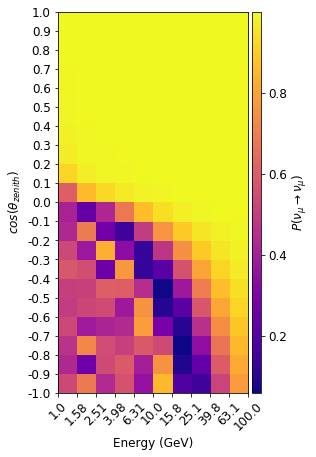

In [9]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(prop_numu_numu, cmap='plasma')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation = 45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar_label = r'$P(\nu_{\mu} \rightarrow \nu_{\mu})$'
cbar.set_label(cbar_label)

### Track-like vs cascade-like rate plots

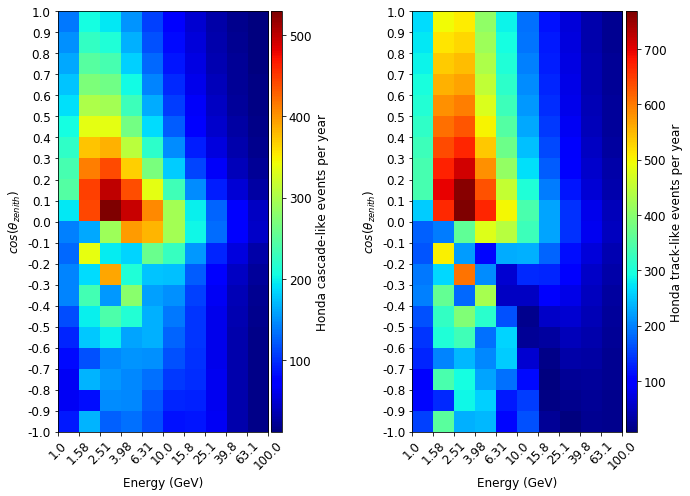

In [170]:
Honda_track_rate = Honda_numu_numu_cc + Honda_nue_numu_cc + Honda_numu_numu_bar_cc + Honda_nue_numu_bar_cc
Honda_cascade_rate = Honda_numu_numu_nc + Honda_nue_numu_nc + Honda_numu_nutau_nc + Honda_numu_nue_nc + Honda_nue_nue_nc \
                        + Honda_nue_nutau_nc + Honda_numu_nutau_cc + Honda_numu_nue_cc + Honda_nue_nue_cc + Honda_nue_nutau_cc \
                        + Honda_numu_numu_bar_nc + Honda_nue_numu_bar_nc + Honda_numu_nutau_bar_nc \
                        + Honda_numu_nue_bar_nc + Honda_nue_nue_bar_nc + Honda_nue_nutau_bar_nc + Honda_numu_nutau_bar_cc \
                        + Honda_numu_nue_bar_cc + Honda_nue_nue_bar_cc + Honda_nue_nutau_bar_cc 

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax.ravel()

im = ax[0].imshow(Honda_cascade_rate/10, cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax[0].set_xlabel('Energy (GeV)')
ax[0].set_ylabel(r'$cos(\theta_{zenith})$')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(energy_strings, rotation = 45)
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(ylabels)
cbar_label = ('Honda cascade-like events per year')
cbar.set_label(cbar_label)


im = ax[1].imshow(Honda_track_rate/10, cmap='jet')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax[1].set_xlabel('Energy (GeV)')
ax[1].set_ylabel(r'$cos(\theta_{zenith})$')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(energy_strings, rotation = 45)
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ylabels)
cbar_label = ('Honda track-like events per year')
cbar.set_label(cbar_label)

fig.tight_layout()
fig.savefig('Honda track and cascade rates')

#### $\chi^2$ fit function

In [133]:
DM32_lim = (0.002, 0.003)


def fit_func(rate, osc_func, theta23, DM32, N):
    
    osc_prob = osc_func(theta23, DM32)
    
    return rate * osc_prob * N


def chi_squared(osc_function, fit_rates, pseudo_data, fit_parameters, guesses):
    
    def chi2_owncalc(*fit_parameters):
        chi2_tot = np.zeros(len(fit_rates))
        
        for f in range(len(fit_rates)):
            
            if len(fit_parameters) == 2:
                osc_prob = osc_function(*fit_parameters)
                fit_data = fit_rates[f] * osc_prob
            
            if len(fit_parameters) == 3:
                fit_data = fit_func(fit_rates[f], osc_function, *fit_parameters)
            
            chi2 = np.sum(((pseudo_data[f] - fit_data)**2 / fit_data))
            chi2_tot[f] = chi2

        return np.sum(chi2_tot)

    chi2_owncalc.errordef = 1.0
    
    if len(fit_parameters)==2:
        minuit = Minuit(chi2_owncalc, theta23 = guesses[0], DM32 = guesses[1] , name=('theta23', 'DM32')) #, limit=[(0, np.pi/2), None])
    elif len(fit_parameters)==3:
        minuit = Minuit(chi2_owncalc, theta23 = guesses[0], DM32 = guesses[1] , N = guesses[2], name=('theta23', 'DM32', 'N'))
        minuit.limits['N'] = (0.5, 1.5)
        
    minuit.limits['theta23'] = (0, theta_maxmixing)
    minuit.limits['DM32'] = DM32_lim
    minuit.tol = 0.00001
    minuit.migrad()
    
    Nvar = len(fit_parameters)               
    Ndof = 200 - Nvar
    
    Chi2_fit = minuit.fval          
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof)
    minuit.migrad()
    
    par = minuit.values[:]
    par_err = minuit.errors[:] 
    par_name = minuit.parameters[:]
    

    return Chi2_fit, Prob_fit, par, par_err

Fit of oscillated data to pseudo-data to get values of $\theta_{23}$ and $\Delta m_{32}^2$. 

### Asimov fits

In [117]:
Chi2_fit_Honda_cc, Prob_fit_Honda_cc, par_Honda_cc, par_err_Honda_cc = chi_squared(oop.prob_numu_numu, [Honda_rate_cc], [Honda_pseudo_data_cc], 
                                               ['theta23', 'DM32', 'N'], [theta23_true, DM32_true, 1])

print('CC:')
print(f'theta23: {par_Honda_cc[0]}, DM32: {par_Honda_cc[1]}, chi^2: {Chi2_fit_Honda_cc}, N: {par_Honda_cc[2]}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

Chi2_fit_Honda_nc, Prob_fit_Honda_nc, par_Honda_nc, par_err_Honda_nc = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], [Honda_pseudo_data_nc], 
                                               ['theta23', 'DM32'], [theta23_true, DM32_true])

print('NC:')
print(f'theta23: {par_Honda_nc[0]}, DM32: {par_Honda_nc[1]}, chi^2: {Chi2_fit_Honda_nc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

CC:
theta23: 0.6777025409252405, DM32: 0.002514010516232364, chi^2: 0.05695764476609303, N: 0.9878947660913706
True values: theta23: 0.7347836150896128, DM32: 0.00251
NC:
theta23: 0.7347836150896128, DM32: 0.00251, chi^2: 0.0
True values: theta23: 0.7347836150896128, DM32: 0.00251


In [9]:
# Combined fit of NC and CC

Chi2_fit_Honda_tot, Prob_fit_Honda_tot, par_Honda_tot, par_err_Honda_tot = chi_squared(oop.prob_numu_numu, [Honda_rate_cc, Honda_rate_nc], [Honda_pseudo_data_cc, Honda_pseudo_data_nc], 
                                               ['theta23', 'DM32'], [theta23_true, DM32_true])

print('CC:')
print(f'theta23: {par_Honda_cc[0]}, DM32: {par_Honda_cc[1]}, chi^2: {Chi2_fit_Honda_cc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')


CC:
theta23: 0.7347836150896128, DM32: 0.00251, chi^2: 0.0
True values: theta23: 0.7347836150896128, DM32: 0.00251


In [10]:
theta23_try = 0.74
DM32_try = 2e-3

Chi2_try_Honda_cc, Prob_fit_try_Honda_cc, par_try_Honda_cc, par_err_try_Honda_cc = chi_squared(oop.prob_numu_numu, [Honda_rate_cc], 
                                                               [Honda_pseudo_data_cc], ['theta23', 'DM32'], [theta23_try, DM32_try])
print('CC:')
print(f'theta23: {par_try_Honda_cc[0]}, DM32: {par_try_Honda_cc[1]}, chi^2: {Chi2_try_Honda_cc}')


Chi2_try_Honda_nc, Prob_fit_try_Honda_nc, par_try_Honda_nc, par_err_try_Honda_nc = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], 
                                                               [Honda_pseudo_data_nc], ['theta23', 'DM32'], [theta23_try, DM32_try])

print('NC')
print(f'theta23: {par_try_Honda_nc[0]}, DM32: {par_try_Honda_nc[1]}, chi^2: {Chi2_try_Honda_nc}')

CC:
theta23: 0.7347836160721204, DM32: 0.002509999999998508, chi^2: 8.642566194971045e-10
NC
theta23: 0.734783616544175, DM32: 0.002510000000289534, chi^2: 9.935734384768212e-11


CC is more sensible to the guesses...

In [31]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

def asimov_fit(rates, pseudo, title, guesses, savefig=False, xrange_theta=None):
    
    chi2_array = np.zeros(len(guesses))
    theta23_fits = np.zeros(len(guesses))
    DM32_fits = np.zeros(len(guesses))
    
    for n in range(len(guesses)):

        Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared(oop.prob_numu_numu, rates, 
                                                                   pseudo, ['theta23', 'DM32'], 
                                                                       guesses[n])
        chi2_array[n] = Chi2_fluct
        theta23_fits[n] = par_fluct[0]
        DM32_fits[n] =  par_fluct[1]
        
    fig, axs = plt.subplots(1, 3, figsize=(15,7))
    axs.ravel()

    true_val = [theta23_true, DM32_true]
    x_labels = [r'$\theta_{23}$ (radians)', r'$\Delta m_{32}^2$ ($eV^2$)', r'$\chi^2$']

    height = len(guesses)/2

    for n in range(3):
        if n<2:
            axs[n].plot([true_val[n], true_val[n]], [0,height/2], 'r-', label='True value')
        #axs[n].set_ylim(0,height)
        axs[n].set_ylabel('Counts')
        axs[n].set_xlabel(x_labels[n])
        axs[n].ticklabel_format(style='plain')
        axs[n].xaxis.set_major_formatter(FormatStrFormatter('%.4f')) #ScalarFormatter(useOffset=False))
        
    if xrange_theta != None:
        theta23_fits = np.array([t for t in theta23_fits if t>xrange_theta[0] and t<xrange_theta[1]])

    x_theta, y_theta, sy_theta, binwidth_theta, theta23_mean, theta23_std = cef.make_hist(axs[0], theta23_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\theta_{23}$ fit values', ''), errors = False)
    x_dm, y_dm, sy_dm, binwidth_dm, DM32_mean, DM32_std = cef.make_hist(axs[1], DM32_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\Delta m_{32}^2$ fit values', ''),errors = False)
    cef.make_hist(axs[2], chi2_array, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\chi^2$ fit values', ''),
                  errors = False)
    #axs[1,0].hist(theta23_fits, bins= 20)
    #axs[1,1].hist(DM32_fits, bins=20)
    #axs[1,2].hist(chi2_array, bins=20)

    plt.suptitle(title, fontsize=20);
    fig.tight_layout(pad=5.0);
    plt.show()
    
    if savefig != False:
        fig.savefig(savefig)
    
    return theta23_fits, np.mean(theta23_fits), np.std(theta23_fits), DM32_fits, np.mean(DM32_fits), np.std(DM32_fits)

In [41]:
# More asimov tests for different guesses
theta_guess = np.linspace(0.2, 0.95, 100)  #(0.5, 0.9, 100)
DM_guess = np.linspace(0.001, 0.003, 100)
guesses = list(zip(theta_guess, DM_guess))

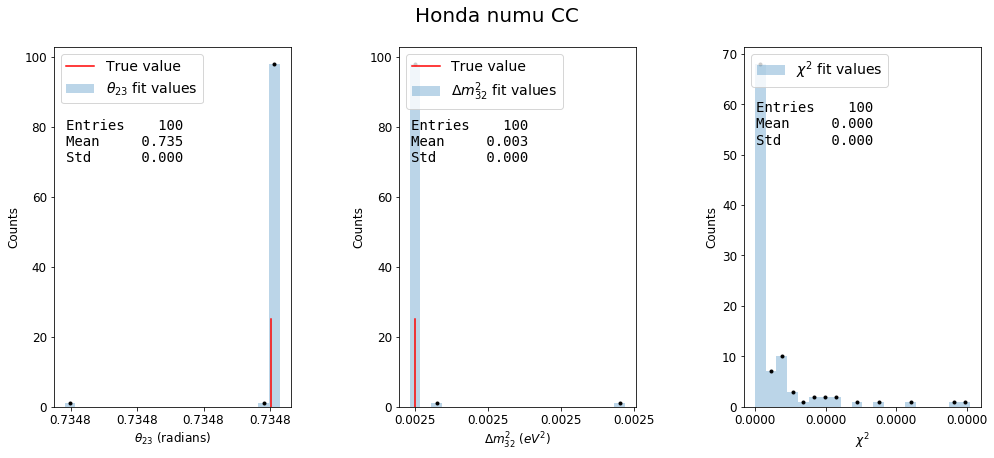

In [42]:
theta23_asimov_Honda_cc, theta23_asimov_mean_Honda_cc, theta23_asimov_std_Honda_cc, DM32_asimov_Honda_cc, DM32_asimov_mean_Honda_cc, DM32_asimov_std_Honda_cc = \
                                                                                                    asimov_fit([Honda_numu_rate10_cc], [Honda_numu_numu_cc], 
                                                                                                               'Honda numu CC', guesses)#,savefig='Honda_asimov_cc')


In [14]:
DM32_asimov_Honda_cc

array([0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251,
       0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251, 0.00251])

In [15]:
# different in 9th decimal
print(['%.10f' % np.sort(theta23_asimov_Honda_cc)[i] for i in range(100)])  #true: 0.7347836151

['0.7347835765', '0.7347835957', '0.7347835999', '0.7347836103', '0.7347836127', '0.7347836129', '0.7347836143', '0.7347836143', '0.7347836145', '0.7347836146', '0.7347836147', '0.7347836147', '0.7347836148', '0.7347836148', '0.7347836149', '0.7347836149', '0.7347836150', '0.7347836150', '0.7347836150', '0.7347836151', '0.7347836153', '0.7347836153', '0.7347836154', '0.7347836155', '0.7347836158', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347836161', '0.7347

In [16]:
z_theta_mean_asimov = abs((theta23_asimov_mean_Honda_cc - theta23_true)/theta23_asimov_std_Honda_cc)
z_DM_mean_asimov = abs((DM32_asimov_mean_Honda_cc - DM32_true))/DM32_asimov_std_Honda_cc
print(z_theta_mean_asimov, z_DM_mean_asimov)

0.004807601375570102 0.12002422135645313


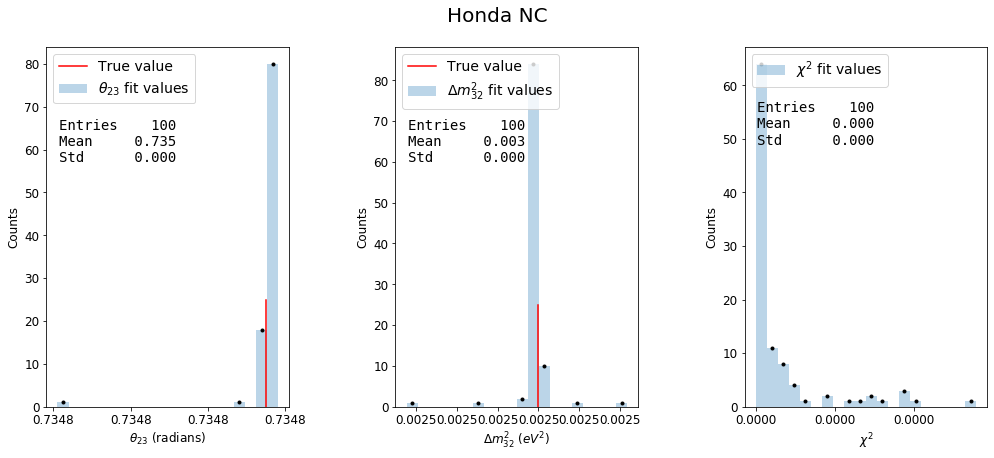

In [111]:
theta23_asimov_Honda_nc, theta23_asimov_mean_Honda_nc, theta23_asimov_std_Honda_nc, DM32_asimov_Honda_nc, DM32_asimov_mean_Honda_nc, DM32_asimov_std_Honda_nc = \
                                                                                                    asimov_fit([Honda_rate10_nc], [Honda_pseudo_data10_nc], 'Honda NC', guesses)


In [18]:
#theta23_asimov_Honda_nc

In [19]:
z_theta_mean_asimov_nc = abs((theta23_asimov_mean_Honda_nc - theta23_true)/theta23_asimov_std_Honda_nc)
z_DM_mean_asimov_nc = abs((DM32_asimov_mean_Honda_nc - DM32_true))/DM32_asimov_std_Honda_nc
print(z_theta_mean_asimov_nc, z_DM_mean_asimov_nc)

0.5477718521766108 0.0799924579146139


### MCEq

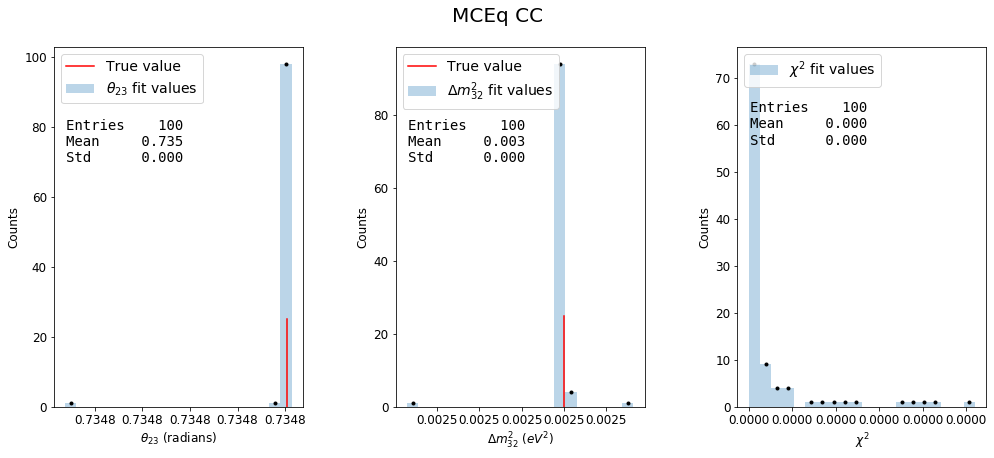

In [112]:
theta23_asimov_MCEq_cc, theta23_asimov_mean_MCEq_cc, theta23_asimov_std_MCEq_cc, DM32_asimov_MCEq_cc, DM32_asimov_mean_MCEq_cc, DM32_asimov_std_MCEq_cc = \
                                                                                                    asimov_fit([MCEq_rate10_cc], [MCEq_pseudo_data10_cc], 'MCEq CC', guesses) #, savefig='Honda_asimov_cc_bad_guess')


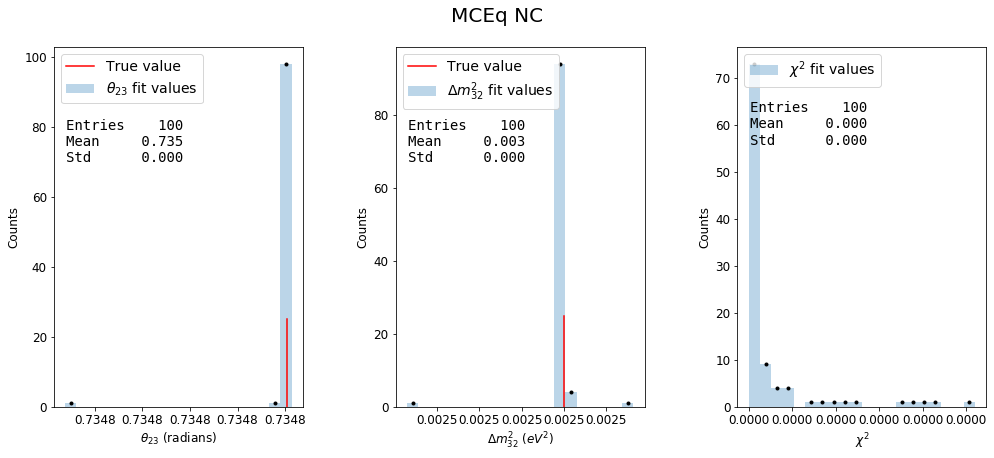

In [113]:
theta23_asimov_MCEq_nc, theta23_asimov_mean_MCEq_nc, theta23_asimov_std_MCEq_nc, DM32_asimov_MCEq_nc, DM32_asimov_mean_MCEq_nc, DM32_asimov_std_MCEq_nc = \
                                                                                                    asimov_fit([MCEq_rate10_nc], [MCEq_pseudo_data10_nc], 'MCEq NC', guesses) #, savefig='Honda_asimov_cc')


In [26]:
def find_nearest_above(my_array, target):
    
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    
    if np.all(mask):
        return None 
    masked_diff = np.ma.masked_array(diff, mask)
    
    return masked_diff.argmin()

In [117]:
N_landscape = 50
theta23_landscape_Honda_cc_asimov = np.linspace(np.sort(theta23_fits_Honda_cc)[0], np.sort(theta23_fits_Honda_cc)[-1], N_landscape)
DM32_landscape_Honda_cc_asimov = np.linspace(np.sort(DM32_fits_Honda_cc)[0], np.sort(DM32_fits_Honda_cc)[-1], N_landscape)

theta23_landscape_Honda_nc_asimov = np.linspace(np.sort(theta23_fits_Honda_nc)[0], np.sort(theta23_fits_Honda_nc)[-1], N_landscape)
DM32_landscape_Honda_nc_asimov = np.linspace(np.sort(DM32_fits_Honda_nc_poisson)[0], np.sort(DM32_fits_Honda_nc_poisson)[-1], N_landscape)
    
chi2_landscape_values_Honda_cc_asimov = np.zeros((N_landscape, N_landscape))
chi2_landscape_values_Honda_nc_asimov = np.zeros((N_landscape, N_landscape))

for t in range(N_landscape):
    for m in range(N_landscape):
        chi2_landscape_values_Honda_cc_asimov[m, t] = chi2_landscape(Honda_rate_cc, Honda_pseudo_data_cc, theta23_landscape_Honda_cc_asimov[t], DM32_landscape_Honda_cc_asimov[m])
        chi2_landscape_values_Honda_nc_asimov[m, t] = chi2_landscape(Honda_rate_nc, Honda_pseudo_data_nc, theta23_landscape_Honda_nc_asimov[t], DM32_landscape_Honda_nc_asimov[m])


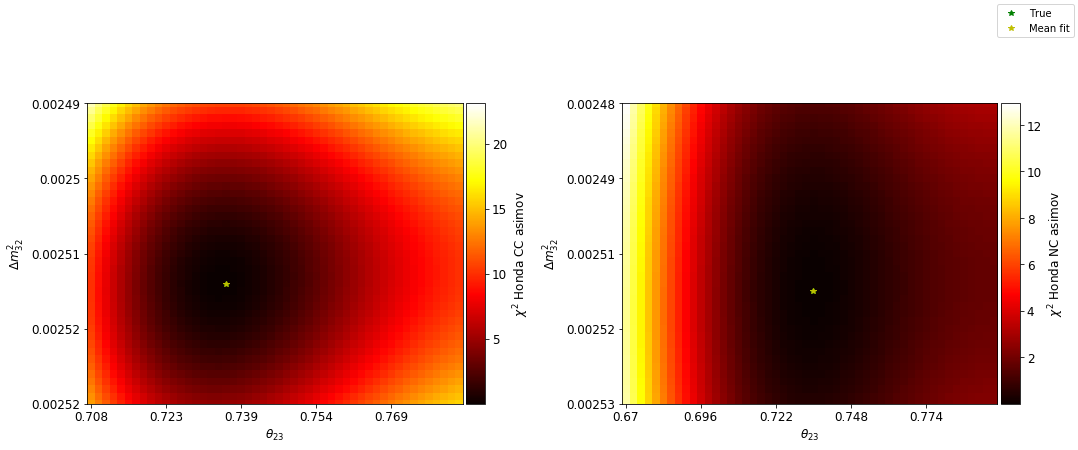

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax.ravel()

im_cc = ax[0].imshow(chi2_landscape_values_Honda_cc_asimov, cmap='hot') #, vmin=0, vmax=70)
divider_cc = make_axes_locatable(ax[0])
cax_cc = divider_cc.append_axes("right", size="5%", pad=0.05)
cbar_cc = plt.colorbar(im_cc, cax=cax_cc)
cbar_cc.set_label(r'$\chi^2$ Honda CC asimov')

#chi2_landscape_values_Honda_nc_plot = chi2_landscape_values_Honda_nc.copy()[:,10:25]

im_nc = ax[1].imshow(chi2_landscape_values_Honda_nc_asimov, cmap='hot') #, vmin=0, vmax=20)
divider_nc = make_axes_locatable(ax[1])
cax_nc = divider_nc.append_axes("right", size="5%", pad=0.05)
cbar_nc = plt.colorbar(im_nc, cax=cax_nc)
cbar_nc.set_label(r'$\chi^2$ Honda NC asimov')

ax[0].plot(find_nearest_above(theta23_landscape_Honda_cc_asimov, theta23_true), find_nearest_above(DM32_landscape_Honda_cc_asimov, DM32_true), 'g*', label='True')
ax[1].plot(find_nearest_above(theta23_landscape_Honda_nc_asimov, theta23_true), find_nearest_above(DM32_landscape_Honda_nc_asimov, DM32_true), 'g*')

ax[0].plot(find_nearest_above(theta23_landscape_Honda_cc_asimov, theta23_asimov_mean_Honda_cc), 
           find_nearest_above(DM32_landscape_Honda_cc_asimov, DM32_asimov_mean_Honda_cc),'y*', label='Mean fit')
ax[1].plot(find_nearest_above(theta23_landscape_Honda_nc_asimov, theta23_asimov_mean_Honda_nc), 
           find_nearest_above(DM32_landscape_Honda_nc_asimov, DM32_asimov_mean_Honda_nc), 'y*')

#chi2_Honda_cc_min_asimov = np.unravel_index(chi2_landscape_values_Honda_cc_asimov.argmin(), chi2_landscape_values_Honda_cc_asimov.shape)
#chi2_Honda_nc_min_asimov = np.unravel_index(chi2_landscape_values_Honda_nc_asimov.argmin(), chi2_landscape_values_Honda_nc_asimov.shape)
#ax[0].plot(chi2_Honda_cc_min_asimov[1], chi2_Honda_cc_min_asimov[0], 'yo', label='Minimum')
#ax[1].plot(chi2_Honda_nc_min_asimov[1], chi2_Honda_nc_min_asimov[0], 'yo')


for n in range(2):
    ax[n].set_xlabel(r'$\theta_{23}$')
    ax[n].set_ylabel(r'$\Delta m^2_{32}$')
    ax[n].set_xticks(np.arange(0,N_landscape, 10))
    ax[n].set_yticks(np.arange(0,N_landscape, 10))
    

ax[0].set_xticklabels([f'{np.round(theta23_landscape_Honda_cc_asimov[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[0].set_yticklabels([f'{np.round(DM32_landscape_Honda_cc_asimov[i], 5)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_xticklabels([f'{np.round(theta23_landscape_Honda_nc_asimov[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_yticklabels([f'{np.round(DM32_landscape_Honda_nc_asimov[i], 5)}' for i in np.arange(0,N_landscape, 10)])
plt.tight_layout()
fig.legend()
#fig.savefig('Honda_asimov_chi2_landscape');

In [61]:
theta23_min_Honda_cc_asimov = theta23_landscape_Honda_cc_asimov[chi2_Honda_cc_min_asimov[1]]
DM32_min_Honda_cc_asimov = DM32_landscape_Honda_cc_asimov[chi2_Honda_cc_min_asimov[0]]

theta23_min_Honda_nc_asimov = theta23_landscape_Honda_nc_asimov[chi2_Honda_nc_min_asimov[1]]
DM32_min_Honda_nc_asimov = DM32_landscape_Honda_nc_asimov[chi2_Honda_nc_min_asimov[0]]

In [62]:
print(theta23_min_Honda_cc_asimov, theta23_min_Honda_nc_asimov)

0.8612244897959184 0.8612244897959184


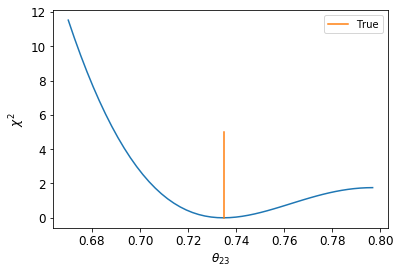

In [120]:
plt.plot(theta23_landscape_Honda_nc_asimov, chi2_landscape_values_Honda_nc_asimov[find_nearest_above(DM32_landscape_Honda_nc_asimov, DM32_true),:])
plt.xlabel(r'$\theta_{23}$')
plt.ylabel(r'$\chi^2$')
plt.plot([theta23_true, theta23_true], [0,5], label='True')
plt.legend();

In [64]:
chi2_Honda_cc_asimov_wrong = [np.zeros((N_landscape, N_landscape)), np.zeros((N_landscape, N_landscape)), np.zeros((N_landscape, N_landscape))]
chi2_Honda_nc_asimov_wrong = [np.zeros((N_landscape, N_landscape)), np.zeros((N_landscape, N_landscape)), np.zeros((N_landscape, N_landscape))]

theta23_dist =  np.array([0.2, 0.1, 0.05])
theta23_wrong = theta_maxmixing - theta23_dist

theta23_wrong_labels = []

for n in range(len(theta23_wrong)):
    _, binned_prob_wrong = oop.prob_numu_numu(theta23_wrong[n], DM32_true)
    Honda_pseudo_cc_wrong = Honda_rate_cc * binned_prob_wrong
    Honda_pseudo_nc_wrong = Honda_rate_nc * binned_prob_wrong
    theta23_landscape_wrong = np.linspace(theta23_wrong[n] - 0.05, (theta_maxmixing + theta23_dist)[n] +0.05 , N_landscape)
    theta23_wrong_labels.append(theta23_landscape_wrong)
    
    for t in range(N_landscape):
        for m in range(N_landscape):
            chi2_Honda_cc_asimov_wrong[n][m, t] = chi2_landscape(Honda_rate_cc, Honda_pseudo_cc_wrong, theta23_landscape_wrong[t], DM32_landscape_Honda_cc_asimov[m])
            chi2_Honda_nc_asimov_wrong[n][m, t] = chi2_landscape(Honda_rate_nc, Honda_pseudo_nc_wrong, theta23_landscape_wrong[t], DM32_landscape_Honda_nc_asimov[m])

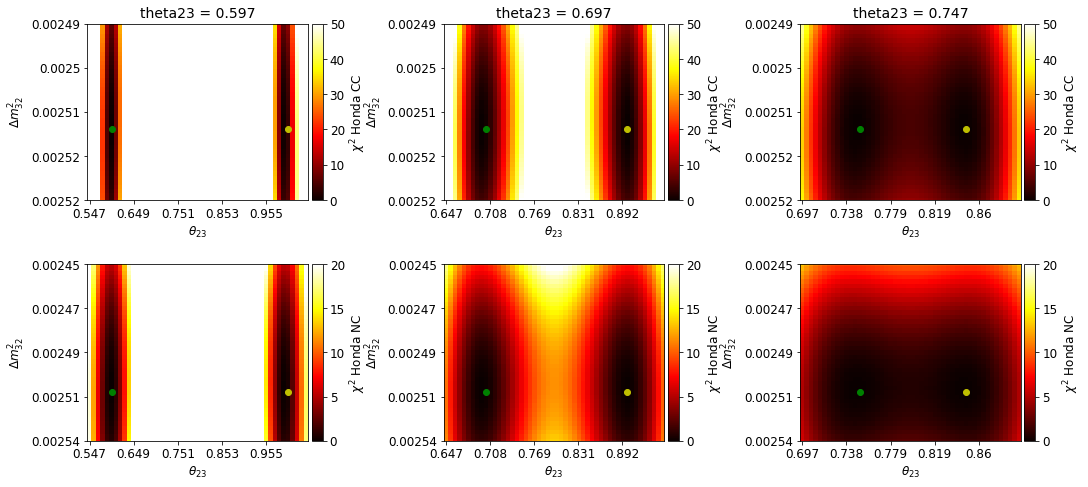

In [66]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))
ax.ravel()

for i in range(3):

    im_cc = ax[0, i].imshow(chi2_Honda_cc_asimov_wrong[i], cmap='hot', vmin=0, vmax=50)
    divider_cc = make_axes_locatable(ax[0, i])
    cax_cc = divider_cc.append_axes("right", size="5%", pad=0.05)
    cbar_cc = plt.colorbar(im_cc, cax=cax_cc)
    cbar_cc.set_label(r'$\chi^2$ Honda CC')

    im_nc = ax[1, i].imshow(chi2_Honda_nc_asimov_wrong[i], cmap='hot', vmin=0, vmax=20)
    divider_nc = make_axes_locatable(ax[1, i])
    cax_nc = divider_nc.append_axes("right", size="5%", pad=0.05)
    cbar_nc = plt.colorbar(im_nc, cax=cax_nc)
    cbar_nc.set_label(r'$\chi^2$ Honda NC')

    ax[0, i].plot(find_nearest_above(theta23_wrong_labels[i], theta23_wrong[i]), find_nearest_above(DM32_landscape_Honda_cc_asimov, DM32_true), 'go')
    ax[1, i].plot(find_nearest_above(theta23_wrong_labels[i], theta23_wrong[i]), find_nearest_above(DM32_landscape_Honda_nc_asimov, DM32_true), 'go')

    chi2_Honda_cc_min_wrong = np.unravel_index(chi2_Honda_cc_asimov_wrong[i][:,30:].argmin(), chi2_Honda_cc_asimov_wrong[i][:,30:].shape)
    chi2_Honda_nc_min_wrong = np.unravel_index(chi2_Honda_nc_asimov_wrong[i][:,30:].argmin(), chi2_Honda_nc_asimov_wrong[i][:,30:].shape)
    
    ax[0, i].plot(find_nearest_above(theta23_wrong_labels[i], (theta_maxmixing + theta23_dist)[i]), find_nearest_above(DM32_landscape_Honda_cc_asimov, DM32_true), 'yo')
    #ax[0, i].plot(chi2_Honda_cc_min_wrong[1], chi2_Honda_cc_min_wrong[0], 'wo')
    ax[1, i].plot(find_nearest_above(theta23_wrong_labels[i], (theta_maxmixing + theta23_dist)[i]), find_nearest_above(DM32_landscape_Honda_nc_asimov, DM32_true), 'yo')
    #ax[1, i].plot(chi2_Honda_nc_min_wrong[1], chi2_Honda_nc_min_wrong[0], 'wo')

for n in range(2):
    for m in range(3):
        ax[n, m].set_xlabel(r'$\theta_{23}$')
        ax[n, m].set_ylabel(r'$\Delta m^2_{32}$')
        ax[n, m].set_xticks(np.arange(0,N_landscape, 10))
        ax[n, m].set_yticks(np.arange(0,N_landscape, 10))
    

        ax[0, m].set_xticklabels([f'{np.round(theta23_wrong_labels[m][i], 3)}' for i in np.arange(0,N_landscape, 10)])
        ax[0, m].set_yticklabels([f'{np.round(DM32_landscape_Honda_cc_asimov[i], 5)}' for i in np.arange(0,N_landscape, 10)])
        ax[1, m].set_xticklabels([f'{np.round(theta23_wrong_labels[m][i], 3)}' for i in np.arange(0,N_landscape, 10)])
        ax[1, m].set_yticklabels([f'{np.round(DM32_landscape_Honda_nc_asimov[i], 5)}' for i in np.arange(0,N_landscape, 10)])
        
        ax[0, m].set_title(f'theta23 = {np.round(theta23_wrong[m],3)}')

plt.tight_layout()
#fig.legend()
#fig.savefig('chi2_landscape_wrong_theta');

In [ ]:
# Check distances from max mixing!

### With fluctuations

In [46]:
# new pseudo-data with fluctuations
r = np.random
#Honda_pseudo_fluctuation_cc = r.poisson(Honda_pseudo_data_cc)
#Honda_pseudo_fluctuation_nc = r.poisson(Honda_pseudo_data_nc)
Honda_numu_numu_cc_fluct = r.poisson(Honda_numu_numu_cc)
Honda_numu_numu_nc_fluct = r.poisson(Honda_numu_numu_nc)

Chi2_fluct_Honda_cc, Prob_fit_fluct_Honda_cc, par_fluct_Honda_cc, par_err_fluct_Honda_cc = chi_squared(oop.prob_numu_numu, [Honda_numu_rate10_cc], 
                                                               [Honda_numu_numu_cc_fluct], ['theta23', 'DM32'], 
                                                                   [theta23_true, DM32_true])

print('CC')
print(f'theta23: {par_fluct_Honda_cc[0]}, DM32: {par_fluct_Honda_cc[1]}, chi^2: {Chi2_fluct_Honda_cc}')

Chi2_fluct_Honda_nc, Prob_fit_fluct_Honda_nc, par_fluct_Honda_nc, par_err_fluct_Honda_nc = chi_squared(oop.prob_numu_numu, [Honda_numu_rate10_nc], 
                                                               [Honda_numu_numu_nc_fluct], ['theta23', 'DM32'], 
                                                                   [theta23_true, DM32_true])

print('NC')
print(f'theta23: {par_fluct_Honda_nc[0]}, DM32: {par_fluct_Honda_nc[1]}, chi^2: {Chi2_fluct_Honda_nc}')

CC
theta23: 0.7322140343964975, DM32: 0.002511208612060881, chi^2: 222.44230771197178
NC
theta23: 0.7340834684798071, DM32: 0.0025160961759322685, chi^2: 201.22138301484944


In [31]:
# CC
z_theta = abs((par_fluct_Honda_cc[0] - theta23_true)/np.sqrt(par_err_fluct_Honda_cc[0]**2 + (1*np.pi/180)**2))
z_DM = abs((par_fluct_Honda_cc[1] - DM32_true)/np.sqrt(par_err_fluct_Honda_cc[1]**2 + (0.027e-3)**2))
print(z_theta, z_DM)

0.20487902182296308 0.3703041357242677


theta23: 0.796889374197734, DM32: 0.002462524578736428, chi^2: 182.61024599967539


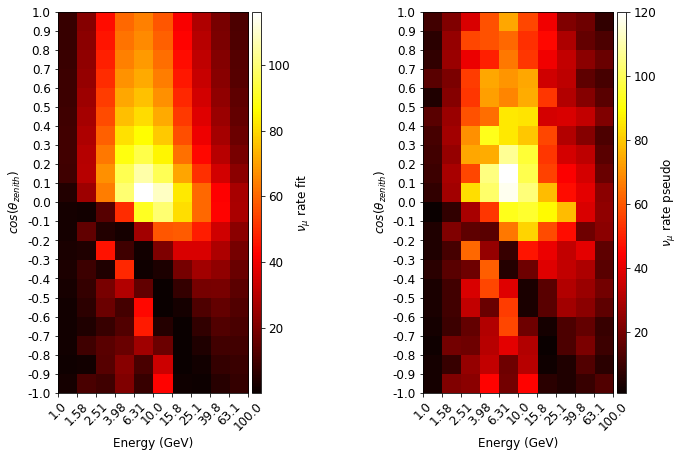

In [33]:

for n in range(1000):
    r = np.random
    Honda_pseudo_fluctuation_nc = r.poisson(Honda_pseudo_data_nc)

    Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], 
                                                                   [Honda_pseudo_fluctuation_nc], ['theta23', 'DM32'], 
                                                                       [theta23_true, DM32_true])
    
    if n==0 or par_fluct[0]<0:

        print(f'theta23: {par_fluct[0]}, DM32: {par_fluct[1]}, chi^2: {Chi2_fluct}')

        prob_numu_to_numu, osc_prob_binned = oop.prob_numu_numu(par_fluct[0], par_fluct[1])
        fit_data = Honda_pseudo_data_nc * osc_prob_binned

        fig, ax = plt.subplots(1, 2, figsize=(12,7))
        ax.ravel()

        im0 = ax[0].imshow(fit_data, cmap='hot')
        divider0 = make_axes_locatable(ax[0])
        cax0 = divider0.append_axes("right", size="5%", pad=0.05)
        cbar0 = plt.colorbar(im0, cax=cax0)
        ax[0].set_xlabel('Energy (GeV)')
        ax[0].set_ylabel(r'$cos(\theta_{zenith})$')
        ax[0].set_xticks(xticks)
        ax[0].set_xticklabels(energy_strings, rotation = 45)
        ax[0].set_yticks(yticks)
        ax[0].set_yticklabels(ylabels)
        cbar_label0 = r'$\nu_{\mu}$ rate fit'
        cbar0.set_label(cbar_label0)

        im1 = ax[1].imshow(Honda_pseudo_fluctuation_nc, cmap='hot')
        divider1 = make_axes_locatable(ax[1])
        cax1 = divider1.append_axes("right", size="5%", pad=0.05)
        cbar1 = plt.colorbar(im1, cax=cax1)
        ax[1].set_xlabel('Energy (GeV)')
        ax[1].set_ylabel(r'$cos(\theta_{zenith})$')
        ax[1].set_xticks(xticks)
        ax[1].set_xticklabels(energy_strings, rotation = 45)
        ax[1].set_yticks(yticks)
        ax[1].set_yticklabels(ylabels)
        cbar_label1 = r'$\nu_{\mu}$ rate pseudo'
        cbar1.set_label(cbar_label1)
        plt.show()
        
        #if par_fluct[0]<0:
        if n==0:
            break

In [129]:
# function for multiple fits

def fit_hist(N, rates, pseudo, title, guess = [theta23_true, DM32_true], true = [theta23_true, DM32_true], savefig = False, normalization=None):
    
    fit_params = ['theta23', 'DM32']
    N_ax = 3
        
    if normalization != None:
        guess.append(normalization)
        fit_params.append('N')
        N_ax = 4
        
    chi2_array = np.zeros(N)
    theta23_fits = np.zeros(N)
    DM32_fits = np.zeros(N)
    N_fits = np.zeros(N)
    
    for n in range(N):
        pseudo_fluct = r.poisson(pseudo) 
        Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared(oop.prob_numu_numu, rates, 
                                                                   pseudo_fluct, fit_params, 
                                                                       guess)
        chi2_array[n] = Chi2_fluct
        theta23_fits[n] = par_fluct[0]
        DM32_fits[n] =  par_fluct[1]
        
        if normalization!=None:
            N_fits[n] = par_fluct[2]
        
    
    fig, axs = plt.subplots(1, N_ax, figsize=(15,7))
    axs.ravel()

    x_labels = [r'$\theta_{23}$ (radians)', r'$\Delta m_{32}^2$ ($eV^2$)', r'$\chi^2$']

    height = N/4

    x_theta, y_theta, sy_theta, binwidth_theta, theta23_mean, theta23_std = cef.make_hist(axs[0], theta23_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\theta_{23}$ fit values', ''), errors = False)
    x_dm, y_dm, sy_dm, binwidth_dm, DM32_mean, DM32_std = cef.make_hist(axs[1], DM32_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\Delta m_{32}^2$ fit values', ''),errors = False)
    cef.make_hist(axs[2], chi2_array, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\chi^2$ fit values', ''),
                  errors = False)
    
    if normalization !=None:
        x_labels.append('N')
        cef.make_hist(axs[3], N_fits, Nbins=20, loc_dic = (0.05, 0.85), label=(r'N fit values', ''),
                  errors = False)
        
    for n in range(N_ax):
        if n<2:
            axs[n].plot([true[n], true[n]], [0,height/2], 'r-', label='True value')
        axs[n].set_ylim(0,height)
        axs[n].set_ylabel('Counts')
        axs[n].set_xlabel(x_labels[n])

    plt.suptitle(title, fontsize=20);
    fig.tight_layout(pad=5.0);
    
    if savefig != False:
        fig.savefig(savefig)
    
    return theta23_fits, theta23_mean, theta23_std, DM32_fits, DM32_mean, DM32_std

317.39224076271057


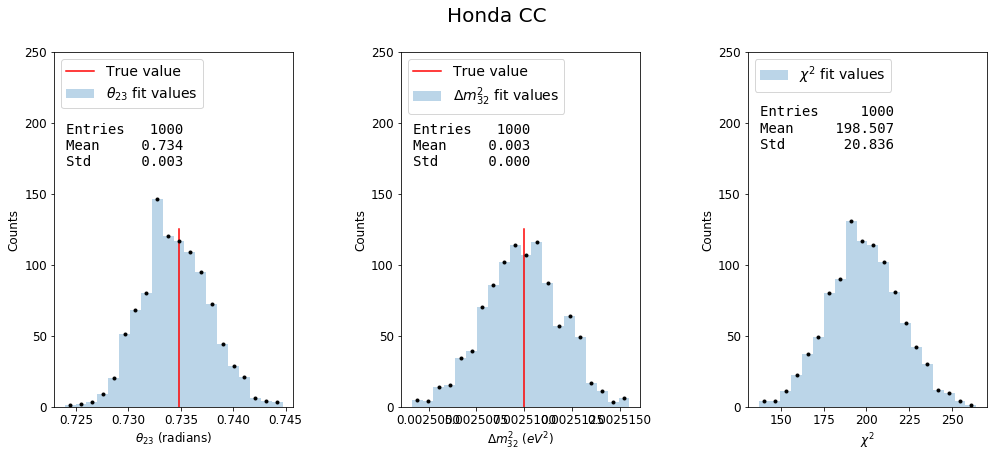

In [121]:
from time import time

t = time()
N_runs = 1000
theta23_fits_Honda_cc, theta23_mean_Honda_cc, theta23_std_Honda_cc, DM32_fits_Honda_cc, DM32_mean_Honda_cc, DM32_std_Honda_cc = \
                                                                                                    fit_hist(N_runs, \
                                                                                                    [Honda_rate10_cc], \
                                                                                                    [Honda_pseudo_data10_cc], \
                                                                                                    'Honda CC') #, savefig='Honda_cc_fits')
print(time()-t)

In [193]:
# tol = 2: time: 78 s, bias - z_theta = 0.26
# tol = 0.0001: time: 100 s, bias - z_theta = 0.32

0.7347836150896128


In [37]:
z_theta_mean = abs((theta23_mean_Honda_cc - theta23_true)/theta23_std_Honda_cc)
z_DM_mean = abs((DM32_mean_Honda_cc - DM32_true))/DM32_std_Honda_cc
skew_cc = (theta23_mean_Honda_cc - stats.mode(theta23_fits_Honda_cc)[0][0]) / theta23_std_Honda_cc
print(z_theta_mean, z_DM_mean, skew_cc)

0.3305828123883123 0.019561414440248247 2.529981748059714


In [122]:
# Fractions of points within 1, 2, 3 sigmas
npoints_1d_sigma_theta23 = [0, 0, 0]
npoints_1d_sigma_DM32 = [0, 0, 0]

for i in range(N_runs):
    for n in range(1,4):
        
        if theta23_fits_Honda_cc[i] < theta23_mean_Honda_cc + n*theta23_std_Honda_cc \
            and theta23_fits_Honda_cc[i] > theta23_mean_Honda_cc - n*theta23_std_Honda_cc:
            npoints_1d_sigma_theta23[n-1] += 1
            
        if DM32_fits_Honda_cc[i] < DM32_mean_Honda_cc + n*DM32_std_Honda_cc \
            and DM32_fits_Honda_cc[i] > DM32_mean_Honda_cc - n*DM32_std_Honda_cc:
            npoints_1d_sigma_DM32[n-1] += 1

sigma_fractions = [0.68, 0.95, 0.997]
for n in range(1,4):
    print('1 sigma of 1000 points:', int(1000*sigma_fractions[n-1]))
    print(f'theta23 fraction of points within', n ,'sigma:', npoints_1d_sigma_theta23[n-1], '+/-', int(np.sqrt(npoints_1d_sigma_theta23[n-1])+0.5))
    print(f'DM32 fraction of points within', n ,'sigma:', npoints_1d_sigma_DM32[n-1], '+/-', int(np.sqrt(npoints_1d_sigma_DM32[n-1])+0.5))

1 sigma of 1000 points: 680
theta23 fraction of points within 1 sigma: 683 +/- 26
DM32 fraction of points within 1 sigma: 674 +/- 26
1 sigma of 1000 points: 950
theta23 fraction of points within 2 sigma: 957 +/- 31
DM32 fraction of points within 2 sigma: 951 +/- 31
1 sigma of 1000 points: 997
theta23 fraction of points within 3 sigma: 997 +/- 32
DM32 fraction of points within 3 sigma: 1000 +/- 32


In [39]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# confidence intervals

def confidence_ellipse(x, y, ax, n_std, facecolor='none', **kwargs):
    # from https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
    
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)      #why?
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    # why rotate?

    ellipse.set_transform(transf + ax.transData)  # what?
    ellipse_plot = ax.add_patch(ellipse)
    
    return ellipse, ellipse_plot

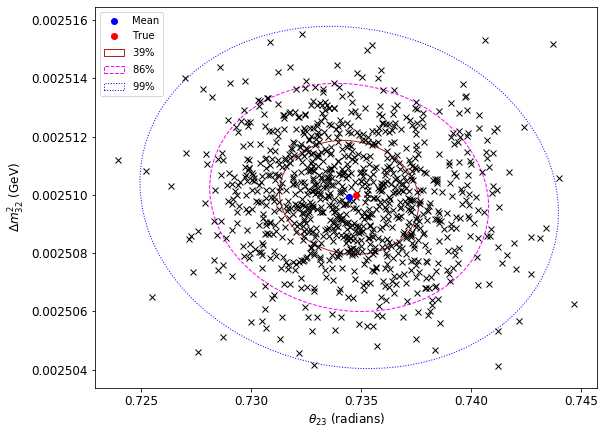

In [125]:
fig, ax = plt.subplots(figsize=(9, 7))

mu_Honda_cc = theta23_mean_Honda_cc, DM32_mean_Honda_cc
scale_Honda_cc = theta23_std_Honda_cc, DM32_std_Honda_cc

ax.plot(theta23_fits_Honda_cc, DM32_fits_Honda_cc, 'kx')

sigma1_contour_Honda_cc, _ = confidence_ellipse(theta23_fits_Honda_cc, DM32_fits_Honda_cc, ax, n_std=1,
                                                label=r'$39\%$', edgecolor='firebrick')
sigma2_contour_Honda_cc, _ = confidence_ellipse(theta23_fits_Honda_cc, DM32_fits_Honda_cc, ax, n_std=2,
                                                label=r'$86\%$', edgecolor='fuchsia', linestyle='--')
sigma3_contour_Honda_cc, _ = confidence_ellipse(theta23_fits_Honda_cc, DM32_fits_Honda_cc, ax, n_std=3,
                                                label=r'$99\%$', edgecolor='blue', linestyle=':')

ax.plot(mu_Honda_cc[0], mu_Honda_cc[1], 'bo', label='Mean')
ax.plot(theta23_true, DM32_true, 'ro', label='True')

ax.legend()
#ax.set_ylim(0.00248, 0.00254)
ax.set_xlabel(r'$\theta_{23}$ (radians)')
ax.set_ylabel(r'$\Delta m_{32}^2$ (GeV)')
#fig.savefig('Honda_cc_confidence')
plt.show()

In [124]:
# Check how many points are within the 1 sigma, 2 sigma contours
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4358977/ Confidence levels for different dimensionality of a Gaussian

fit_points = list(zip(theta23_fits_Honda_cc, DM32_fits_Honda_cc))

n_points_sigma1 = 0
n_points_sigma2 = 0
n_points_sigma3 = 0

for p in fit_points:
    within_sigma1 = sigma1_contour_Honda_cc.contains_point(ax.transData.transform(p))              
    if within_sigma1:
        n_points_sigma1 += 1
        
    within_sigma2 = sigma2_contour_Honda_cc.contains_point(ax.transData.transform(p))              
    if within_sigma2:
        n_points_sigma2 += 1
        
    within_sigma3 = sigma3_contour_Honda_cc.contains_point(ax.transData.transform(p))              
    if within_sigma3:
        n_points_sigma3 += 1
        
print(f'Fraction of points within 39%-contour: {n_points_sigma1}', '+/-', int(np.sqrt(n_points_sigma1)+0.5))
print(f'Fraction of points within 86%-contour: {n_points_sigma2}', '+/-', int(np.sqrt(n_points_sigma2)+0.5))
print(f'Fraction of points within 99%-contour: {n_points_sigma3}', '+/-', int(np.sqrt(n_points_sigma3)+0.5))

Fraction of points within 39%-contour: 410 +/- 20
Fraction of points within 86%-contour: 876 +/- 30
Fraction of points within 99%-contour: 988 +/- 31


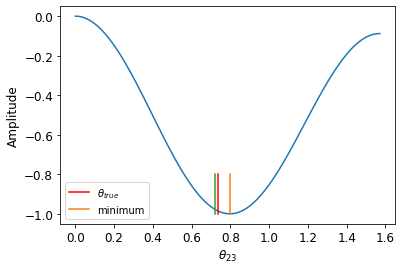

In [99]:
theta13 =  8.62/180 * np.pi

def A(theta23):
    x = np.sin(theta23)**2 *np.cos(theta13)**2
    amp = 4*x**2 - 4*x
    return amp

x = np.linspace(0,1,100)
thetas = np.linspace(0,np.pi/2, 100)
plt.plot(thetas, A(thetas))
plt.plot([theta23_true, theta23_true], [-1,-0.8], 'r-', label=r'$\theta_{true}$')
plt.plot([theta_maxmixing, theta_maxmixing], [-1,-0.8], label='minimum')
plt.plot([theta_maxmixing-(50*np.pi/180-theta_maxmixing), theta_maxmixing-(50*np.pi/180-theta_maxmixing)], [-1,-0.8])
plt.xlabel(r'$\theta_{23}$')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('P_amplitude');

In [44]:
#print(theta23_min_Honda_nc_asimov - theta_maxmixing, theta_maxmixing - theta23_true)

In [45]:

print(np.arcsin(np.sqrt(1/2/np.cos(theta13)**2)))
print(np.sin(theta23_true)**2 *np.cos(theta13)**2)

0.7968893709850228
0.4393748452117815


In [139]:
theta_maxmixing*180/np.pi

45.65843373618017

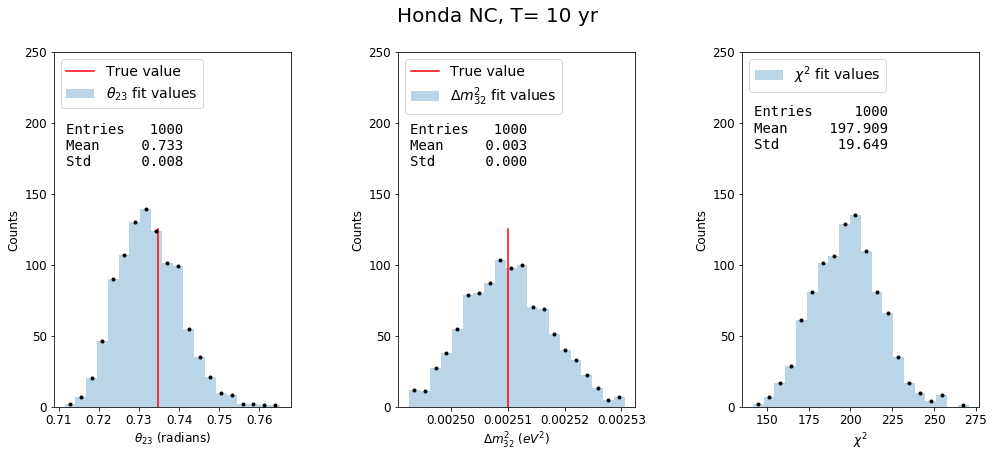

In [140]:
theta23_fits_Honda_nc, theta23_mean_Honda_nc, theta23_std_Honda_nc, \
DM32_fits_Honda_nc, DM32_mean_Honda_nc, DM32_std_Honda_nc = \
                                                                            fit_hist(N_runs, \
                                                                            [Honda_rate10_nc], \
                                                                            [Honda_pseudo_data10_nc], \
                                                                            title = 'Honda NC, T= 10 yr',\
                                                                            fluct = 'poisson')

In [102]:
theta_maxmixing-(50*np.pi/180-theta_maxmixing)
0.65*180/np.pi

37.24225668350351

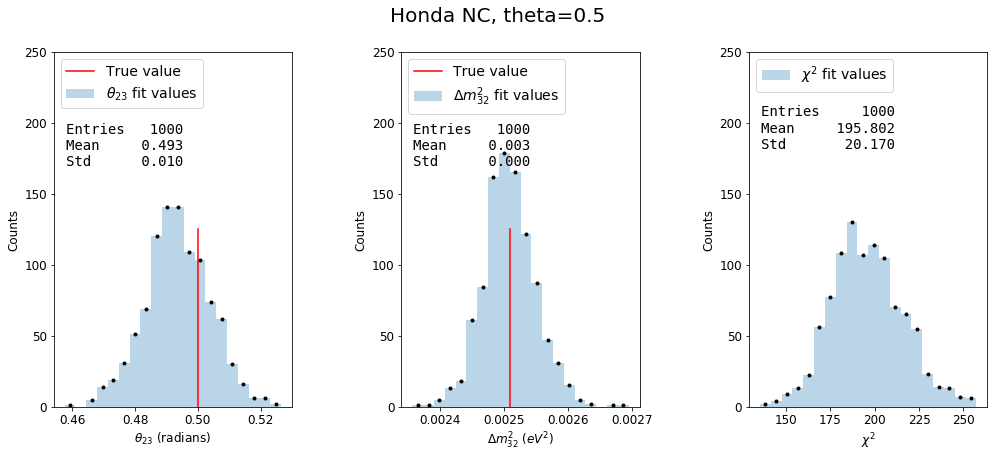

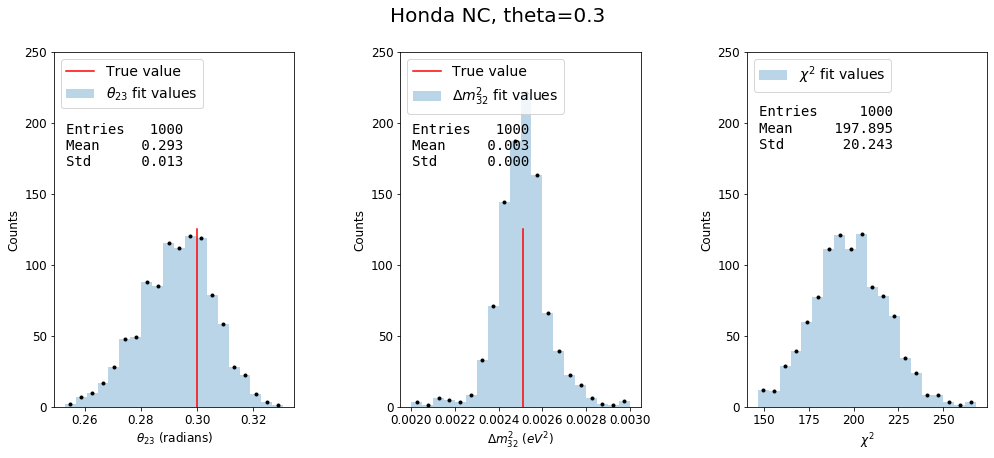

In [36]:
theta23_bias_test = [0.5, 0.3] #theta_maxmixing, theta23_true,0.65, 

for theta in theta23_bias_test:
    binned_prob_bias_test = oop.prob_numu_numu(theta, DM32_true) 
    Honda_pseudo_data_bias_test = Honda_rate_nc * binned_prob_bias_test
    title = f'Honda NC, theta={theta}'
    _, _, _, _, _, _ = fit_hist(N_runs, [Honda_rate_nc], [Honda_pseudo_data_bias_test], title = title, 
                                guess=[theta, DM32_true], true=[theta, DM32_true]) #, fluct = 'poisson') #, savefig=title)

In [50]:
import scipy.stats as st

z_theta_mean = abs((theta23_mean_Honda_nc_poisson - theta23_true)/theta23_std_Honda_nc_poisson)
z_DM_mean = abs((DM32_mean_Honda_nc_poisson - DM32_true))/DM32_std_Honda_nc_poisson
skew = (theta23_mean_Honda_nc_poisson - st.mode(theta23_fits_Honda_nc_poisson)[0][0]) / theta23_std_Honda_nc_poisson
print(z_theta_mean, z_DM_mean, skew)

0.9120515802319965 0.22722863052989434 2.260161930562393


In [ ]:
# double poisson: 0.959578660571171 0.12204557216364417 2.3945996640904363
# simple poisson: 0.654526325261985 0.05442231367649595 2.581178845963123

In [ ]:
# tol = 0.1: z_theta = 0.66
# tol = 0.0001: z_theta = 0.77

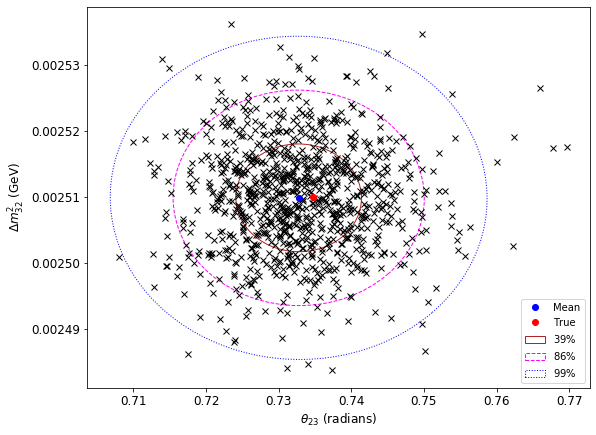

In [127]:
fig, ax = plt.subplots(figsize=(9, 7))

mu_Honda_nc = theta23_mean_Honda_nc_poisson, DM32_mean_Honda_nc_poisson
scale_Honda_nc = theta23_std_Honda_nc_poisson, DM32_std_Honda_nc_poisson

ax.plot(theta23_fits_Honda_nc_poisson, DM32_fits_Honda_nc_poisson, 'kx')

sigma1_contour_Honda_nc, _ = confidence_ellipse(theta23_fits_Honda_nc_poisson, DM32_fits_Honda_nc_poisson, ax, n_std=1,
                                                label=r'$39\%$', edgecolor='firebrick')
sigma2_contour_Honda_nc, _ = confidence_ellipse(theta23_fits_Honda_nc_poisson, DM32_fits_Honda_nc_poisson, ax, n_std=2,
                                                label=r'$86\%$', edgecolor='fuchsia', linestyle='--')
sigma3_contour_Honda_nc, _ = confidence_ellipse(theta23_fits_Honda_nc_poisson, DM32_fits_Honda_nc_poisson, ax, n_std=3,
                                                label=r'$99\%$', edgecolor='blue', linestyle=':')

ax.plot(mu_Honda_nc[0], mu_Honda_nc[1], 'bo', label='Mean')
ax.plot(theta23_true, DM32_true, 'ro', label='True')

ax.legend()
#ax.set_ylim(0.00248, 0.00254)
#ax.set_xlim(0.5, 0.9)
ax.set_xlabel(r'$\theta_{23}$ (radians)')
ax.set_ylabel(r'$\Delta m_{32}^2$ (GeV)')
#fig.savefig('Honda_cc_confidence')
plt.show()

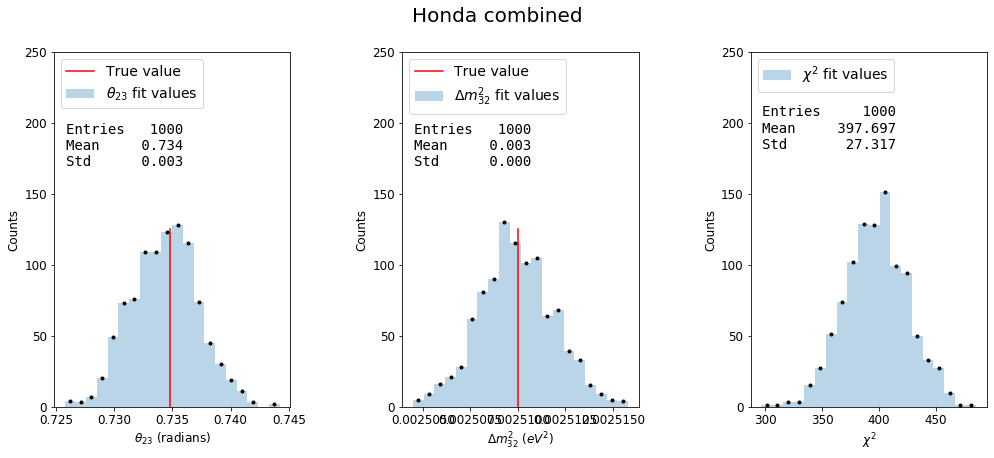

In [128]:
# combined fit of NC and CC

theta23_fits_Honda_tot, theta23_mean_Honda_tot, theta23_std_Honda_tot, DM32_fits_Honda_tot, DM32_mean_Honda_tot, DM32_std_Honda_tot = \
                                                                                                    fit_hist(N_runs, \
                                                                                                    [Honda_rate10_cc, Honda_rate10_nc], \
                                                                                                    [Honda_pseudo_data10_cc, Honda_pseudo_data10_nc], \
                                                                                                    'Honda combined')

In [58]:
# chi squared landscape Honda CC

def chi2_landscape(rate, pseudo, theta23, DM32):
    
    _, binned_prob = oop.prob_numu_numu(theta23, DM32)
    osc_rate = rate * binned_prob
    
    chi2 = np.sum(((osc_rate - pseudo)**2 / osc_rate))
    
    return chi2

In [638]:
N_landscape = 50
theta23_landscape_Honda_cc = np.linspace(np.sort(theta23_fits_Honda_cc)[0], np.sort(theta23_fits_Honda_cc)[-1], N_landscape)
DM32_landscape_Honda_cc = np.linspace(np.sort(DM32_fits_Honda_cc)[0], np.sort(DM32_fits_Honda_cc)[-1], N_landscape)

theta23_landscape_Honda_nc = np.linspace(np.sort(theta23_fits_Honda_nc)[0], np.sort(theta23_fits_Honda_nc)[-1], N_landscape)
DM32_landscape_Honda_nc = np.linspace(np.sort(DM32_fits_Honda_nc)[0], np.sort(DM32_fits_Honda_nc)[-1], N_landscape)

chi2_Honda_cc_mean = np.zeros((N_landscape, N_landscape))
chi2_Honda_nc_mean = np.zeros((N_landscape, N_landscape))

for n in range(10):
    Honda_fluct_cc = r.poisson(Honda_pseudo_data_cc)
    Honda_fluct_nc = r.poisson(Honda_pseudo_data_nc)
    
    #_, theta23_mean, _, _, _, _ = fit_hist(1, [Honda_rate_cc, Honda_rate_nc], [Honda_pseudo_data_cc, Honda_pseudo_data_nc], 'Honda combined')
    
    chi2_landscape_values_Honda_cc = np.zeros((N_landscape, N_landscape))
    chi2_landscape_values_Honda_nc = np.zeros((N_landscape, N_landscape))

    for t in range(N_landscape):
        for m in range(N_landscape):
            chi2_landscape_values_Honda_cc[m, t] = chi2_landscape(Honda_rate_cc, Honda_fluct_cc, 
                                                                  theta23_landscape_Honda_cc[t], DM32_landscape_Honda_cc[m])
            chi2_landscape_values_Honda_nc[m, t] = chi2_landscape(Honda_rate_nc, Honda_fluct_nc, 
                                                                  theta23_landscape_Honda_nc[t], DM32_landscape_Honda_nc[m])
    #print(chi2_landscape_values_Honda_nc.min())        
    chi2_Honda_cc_mean += chi2_landscape_values_Honda_cc
    chi2_Honda_nc_mean += chi2_landscape_values_Honda_nc
    
chi2_Honda_cc_mean /= 10
chi2_Honda_nc_mean /= 10


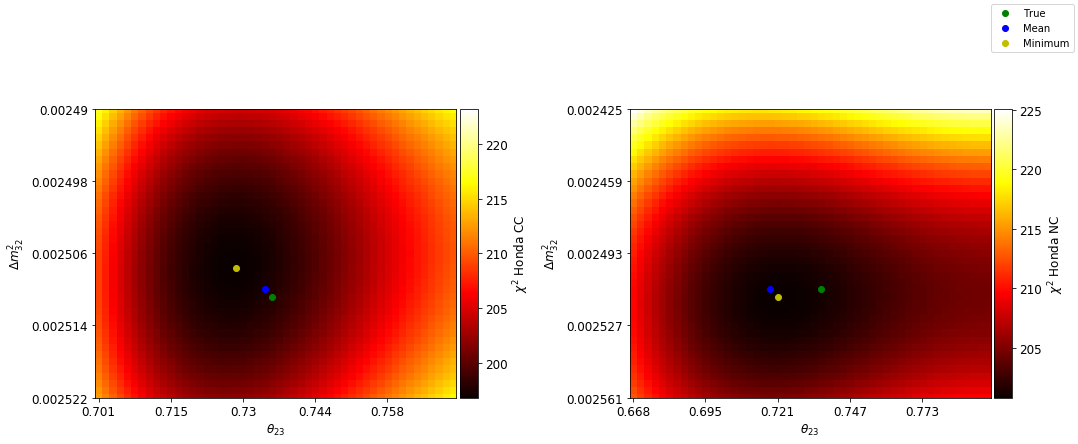

In [639]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax.ravel()

im_cc = ax[0].imshow(chi2_Honda_cc_mean, cmap='hot')
divider_cc = make_axes_locatable(ax[0])
cax_cc = divider_cc.append_axes("right", size="5%", pad=0.05)
cbar_cc = plt.colorbar(im_cc, cax=cax_cc)
cbar_cc.set_label(r'$\chi^2$ Honda CC')

#chi2_landscape_values_Honda_nc_plot = chi2_landscape_values_Honda_nc.copy()[:,10:25]

im_nc = ax[1].imshow(chi2_Honda_nc_mean, cmap='hot')
divider_nc = make_axes_locatable(ax[1])
cax_nc = divider_nc.append_axes("right", size="5%", pad=0.05)
cbar_nc = plt.colorbar(im_nc, cax=cax_nc)
cbar_nc.set_label(r'$\chi^2$ Honda NC')

ax[0].plot(find_nearest_above(theta23_landscape_Honda_cc, theta23_true), 
           find_nearest_above(DM32_landscape_Honda_cc, DM32_true), 'go', label='True')
ax[0].plot(find_nearest_above(theta23_landscape_Honda_cc, theta23_mean_Honda_cc), 
           find_nearest_above(DM32_landscape_Honda_cc, DM32_mean_Honda_cc), 'bo', label='Mean')
ax[1].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_true), find_nearest_above(DM32_landscape_Honda_nc, DM32_true), 'go')
ax[1].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_mean_Honda_nc), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_mean_Honda_nc), 'bo')

chi2_Honda_cc_min = np.unravel_index(chi2_Honda_cc_mean.argmin(), chi2_Honda_cc_mean.shape)
chi2_Honda_nc_min = np.unravel_index(chi2_Honda_nc_mean.argmin(), chi2_Honda_nc_mean.shape)

ax[0].plot(chi2_Honda_cc_min[1], chi2_Honda_cc_min[0], 'yo', label='Minimum')
ax[1].plot(chi2_Honda_nc_min[1], chi2_Honda_nc_min[0], 'yo')

for n in range(2):
    ax[n].set_xlabel(r'$\theta_{23}$')
    ax[n].set_ylabel(r'$\Delta m^2_{32}$')
    ax[n].set_xticks(np.arange(0,N_landscape, 10))
    ax[n].set_yticks(np.arange(0,N_landscape, 10))
    

ax[0].set_xticklabels([f'{np.round(theta23_landscape_Honda_cc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[0].set_yticklabels([f'{np.round(DM32_landscape_Honda_cc[i], 6)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_xticklabels([f'{np.round(theta23_landscape_Honda_nc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_yticklabels([f'{np.round(DM32_landscape_Honda_nc[i], 6)}' for i in np.arange(0,N_landscape, 10)])
fig.legend()
plt.tight_layout();

# These means are from the histograms

In [461]:
print('CC min: theta23 =', theta23_landscape_Honda_cc[chi2_Honda_cc_min[1]], 'DM32 =',  DM32_landscape_Honda_cc[chi2_Honda_cc_min[0]])
print('Asimov: theta23 =', theta23_min_Honda_cc_asimov, 'DM32 =', DM32_min_Honda_cc_asimov)
print('NC min: theta23 =', theta23_landscape_Honda_nc[chi2_Honda_nc_min[1]], 'DM32 =',  DM32_landscape_Honda_nc[chi2_Honda_nc_min[0]])
print('Asimov: theta23 =', theta23_min_Honda_nc_asimov, 'DM32 =', DM32_min_Honda_nc_asimov)

CC min: theta23 = 0.7302192238288658 DM32 = 0.0025104289504475747
Asimov: theta23 = 0.7342562649045992 DM32 = 0.0025096496425046
NC min: theta23 = 0.7178887218521673 DM32 = 0.0025140008319175394
Asimov: theta23 = 0.7342337309684686 DM32 = 0.0025108681141273754


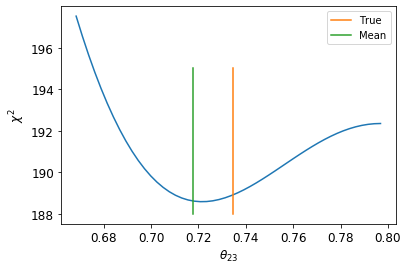

In [498]:
plt.plot(theta23_landscape_Honda_nc, chi2_Honda_nc_mean[find_nearest_above(DM32_landscape_Honda_nc, DM32_mean_Honda_nc),:])
plt.xlabel(r'$\theta_{23}$')
plt.ylabel(r'$\chi^2$')
plt.plot([theta23_true, theta23_true], [188,195], label='True')
plt.plot([theta23_mean_Honda_nc, theta23_mean_Honda_nc], [188,195], label='Mean')
plt.legend();

In [640]:
chi2_Honda_nc_mean_poisson = np.zeros((N_landscape, N_landscape))
chi2_Honda_nc_mean_normal = np.zeros((N_landscape, N_landscape))
chi2_Honda_nc_mean_uniform = np.zeros((N_landscape, N_landscape))

N = 50
theta23_poisson = np.zeros(N)
theta23_gauss = np.zeros(N)
theta23_uni = np.zeros(N)
DM32_poisson = np.zeros(N)
DM32_gauss = np.zeros(N)
DM32_uni = np.zeros(N)

for n in range(N):
    Honda_poisson_nc = r.poisson(Honda_pseudo_data_nc)
    Honda_normal_nc = r.normal(Honda_pseudo_data_nc)
    Honda_uniform_nc = Honda_pseudo_data_nc + r.uniform(-np.sqrt(Honda_pseudo_data_nc), np.sqrt(Honda_pseudo_data_nc))
    
    chi2_landscape_poisson_Honda_nc = np.zeros((N_landscape, N_landscape))
    chi2_landscape_normal_Honda_nc = np.zeros((N_landscape, N_landscape))
    chi2_landscape_uniform_Honda_nc = np.zeros((N_landscape, N_landscape))

    for t in range(N_landscape):
        for m in range(N_landscape):
            chi2_landscape_poisson_Honda_nc[m, t] = chi2_landscape(Honda_rate_nc, Honda_poisson_nc, 
                                                                  theta23_landscape_Honda_nc[t], DM32_landscape_Honda_nc[m])
            chi2_landscape_normal_Honda_nc[m, t] = chi2_landscape(Honda_rate_nc, Honda_normal_nc, 
                                                                  theta23_landscape_Honda_nc[t], DM32_landscape_Honda_nc[m])   
            chi2_landscape_uniform_Honda_nc[m, t] = chi2_landscape(Honda_rate_nc, Honda_uniform_nc, 
                                                                  theta23_landscape_Honda_nc[t], DM32_landscape_Honda_nc[m])       

    chi2_Honda_nc_mean_poisson += chi2_landscape_poisson_Honda_nc
    chi2_Honda_nc_mean_normal += chi2_landscape_normal_Honda_nc
    chi2_Honda_nc_mean_uniform += chi2_landscape_uniform_Honda_nc
    
            
    _, _, par_poisson, _ = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], [Honda_poisson_nc], ['theta23', 'DM32'], [theta23_true, DM32_true])
    theta23_poisson[n] = par_poisson[0]
    DM32_poisson[n] = par_poisson[1]
    _, _, par_gauss, _ = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], [Honda_normal_nc], ['theta23', 'DM32'], [theta23_true, DM32_true])
    theta23_gauss[n] = par_gauss[0]
    DM32_gauss[n] = par_gauss[1]
    _, _, par_uni, _ = chi_squared(oop.prob_numu_numu, [Honda_rate_nc], [Honda_uniform_nc], ['theta23', 'DM32'], [theta23_true, DM32_true])
    theta23_uni[n] = par_uni[0]
    DM32_uni[n] = par_uni[1]
    

chi2_Honda_nc_mean_poisson /= N
chi2_Honda_nc_mean_normal /= N
chi2_Honda_nc_mean_uniform /= N

theta23_poisson_mean = np.mean(theta23_poisson)
theta23_gauss_mean = np.mean(theta23_gauss)
theta23_uni_mean = np.mean(theta23_uni)
DM32_poisson_mean = np.mean(DM32_poisson)
DM32_gauss_mean = np.mean(DM32_gauss)
DM32_uni_mean = np.mean(DM32_uni)

chi2_Honda_nc_min_poisson = np.unravel_index(chi2_Honda_nc_mean_poisson.argmin(), chi2_Honda_nc_mean_poisson.shape)
poisson_theta_shift = theta23_min_Honda_nc_asimov - theta23_landscape_Honda_nc[chi2_Honda_nc_min_poisson[1]]

chi2_Honda_nc_min_normal = np.unravel_index(chi2_Honda_nc_mean_normal.argmin(), chi2_Honda_nc_mean_normal.shape)
normal_theta_shift = theta23_min_Honda_nc_asimov - theta23_landscape_Honda_nc[chi2_Honda_nc_min_normal[1]]

chi2_Honda_nc_min_uniform = np.unravel_index(chi2_Honda_nc_mean_uniform.argmin(), chi2_Honda_nc_mean_uniform.shape)
uniform_theta_shift = theta23_min_Honda_nc_asimov - theta23_landscape_Honda_nc[chi2_Honda_nc_min_uniform[1]]

print('Theta23 shift for poisson:', poisson_theta_shift, ', gauss:', normal_theta_shift, ', uniform:', uniform_theta_shift)

Theta23 shift for poisson: 0.1409853857569272 , gauss: 0.13049320111024454 , uniform: 0.13573929343358582


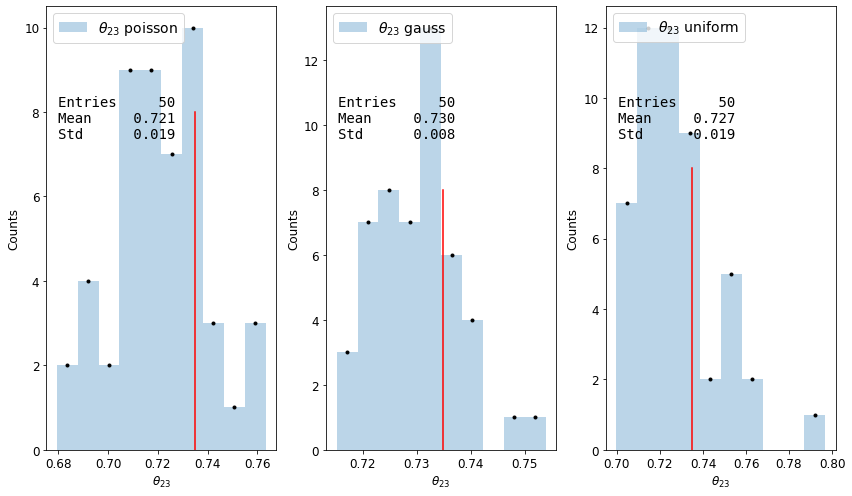

In [642]:
fig, axs = plt.subplots(1,3, figsize=(12,7))
axs.ravel()

cef.make_hist(axs[0], theta23_poisson, Nbins=10, loc_dic = (0.05, 0.8), label=(r'$\theta_{23}$ poisson', ''), errors = False)
cef.make_hist(axs[1], theta23_gauss, Nbins=10, loc_dic = (0.05, 0.8), label=(r'$\theta_{23}$ gauss', ''), errors = False)
cef.make_hist(axs[2], theta23_uni, Nbins=10, loc_dic = (0.05, 0.8), label=(r'$\theta_{23}$ uniform', ''), errors = False)

for i in range(3):
    axs[i].set_xlabel(r'$\theta_{23}$')
    axs[i].set_ylabel('Counts')
    axs[i].plot([theta23_true, theta23_true], [0,8], 'r-', label='True');

fig.tight_layout()

In [564]:
print('Min poisson fluctuations:', theta23_landscape_Honda_nc[chi2_Honda_nc_min_poisson[1]])
print('Min gauss fluctuations:', theta23_landscape_Honda_nc[chi2_Honda_nc_min_normal[1]])
print('Min uniform fluctuations:', theta23_landscape_Honda_nc[chi2_Honda_nc_min_uniform[1]])
print('True theta23:', theta23_true)

Min poisson fluctuations: 0.7129521953891191
Min gauss fluctuations: 0.7286904723591432
Min uniform fluctuations: 0.7286904723591432
True theta23: 0.7347836150896128


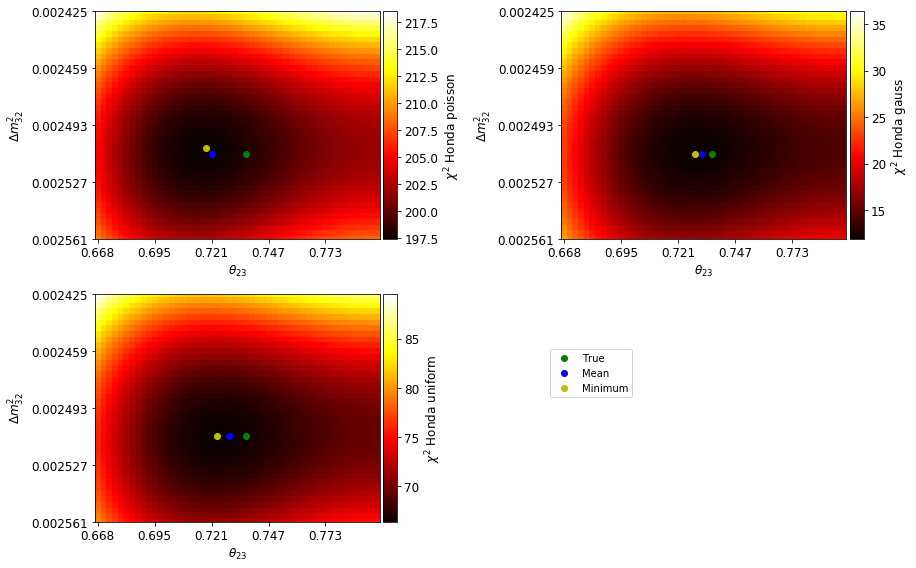

In [643]:
fig, ax = plt.subplots(2, 2, figsize=(13,8))
ax.ravel()

im_poisson = ax[0,0].imshow(chi2_Honda_nc_mean_poisson, cmap='hot')
divider_poisson = make_axes_locatable(ax[0,0])
cax_poisson = divider_poisson.append_axes("right", size="5%", pad=0.05)
cbar_poisson = plt.colorbar(im_poisson, cax=cax_poisson)
cbar_poisson.set_label(r'$\chi^2$ Honda poisson')

im_gauss = ax[0,1].imshow(chi2_Honda_nc_mean_normal, cmap='hot')
divider_gauss = make_axes_locatable(ax[0,1])
cax_gauss = divider_gauss.append_axes("right", size="5%", pad=0.05)
cbar_gauss = plt.colorbar(im_gauss, cax=cax_gauss)
cbar_gauss.set_label(r'$\chi^2$ Honda gauss')

im_uni = ax[1,0].imshow(chi2_Honda_nc_mean_uniform, cmap='hot')
divider_uni = make_axes_locatable(ax[1,0])
cax_uni = divider_uni.append_axes("right", size="5%", pad=0.05)
cbar_uni = plt.colorbar(im_uni, cax=cax_uni)
cbar_uni.set_label(r'$\chi^2$ Honda uniform')

ax[0,0].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_true), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_true), 'go', label='True')
ax[0,0].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_poisson_mean), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_poisson_mean), 'bo', label='Mean')
ax[0,1].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_true), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_true), 'go')
ax[0,1].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_gauss_mean), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_gauss_mean), 'bo')
ax[1,0].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_true), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_true), 'go')
ax[1,0].plot(find_nearest_above(theta23_landscape_Honda_nc, theta23_uni_mean), 
           find_nearest_above(DM32_landscape_Honda_nc, DM32_uni_mean), 'bo')

chi2_Honda_nc_min_poisson = np.unravel_index(chi2_Honda_nc_mean_poisson.argmin(), chi2_Honda_nc_mean_poisson.shape)
chi2_Honda_nc_min_gauss = np.unravel_index(chi2_Honda_nc_mean_normal.argmin(), chi2_Honda_nc_mean_normal.shape)
chi2_Honda_nc_min_uniform = np.unravel_index(chi2_Honda_nc_mean_uniform.argmin(), chi2_Honda_nc_mean_uniform.shape)

ax[0,0].plot(chi2_Honda_nc_min_poisson[1], chi2_Honda_nc_min_poisson[0], 'yo', label='Minimum')
ax[0,1].plot(chi2_Honda_nc_min_gauss[1], chi2_Honda_nc_min_gauss[0], 'yo')
ax[1,0].plot(chi2_Honda_nc_min_uniform[1], chi2_Honda_nc_min_uniform[0], 'yo')

for n in range(2):
    ax[0,n].set_xlabel(r'$\theta_{23}$')
    ax[0,n].set_ylabel(r'$\Delta m^2_{32}$')
    ax[0,n].set_xticks(np.arange(0,N_landscape, 10))
    ax[0,n].set_yticks(np.arange(0,N_landscape, 10))
    ax[0,n].set_xticklabels([f'{np.round(theta23_landscape_Honda_nc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
    ax[0,n].set_yticklabels([f'{np.round(DM32_landscape_Honda_nc[i], 6)}' for i in np.arange(0,N_landscape, 10)])
    
ax[1,0].set_xlabel(r'$\theta_{23}$')
ax[1,0].set_ylabel(r'$\Delta m^2_{32}$')
ax[1,0].set_xticks(np.arange(0,N_landscape, 10))
ax[1,0].set_yticks(np.arange(0,N_landscape, 10))
ax[1,0].set_xticklabels([f'{np.round(theta23_landscape_Honda_nc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[1,0].set_yticklabels([f'{np.round(DM32_landscape_Honda_nc[i], 6)}' for i in np.arange(0,N_landscape, 10)])

fig.delaxes(ax[1,1])
fig.legend(loc=(0.6,0.3))
plt.tight_layout();

In [566]:
print(theta23_poisson_mean, theta23_gauss_mean, theta23_uni_mean, theta23_true)

0.7188491728397964 0.731230856831053 0.7302833345709548 0.7347836150896128


## MCEq 1D

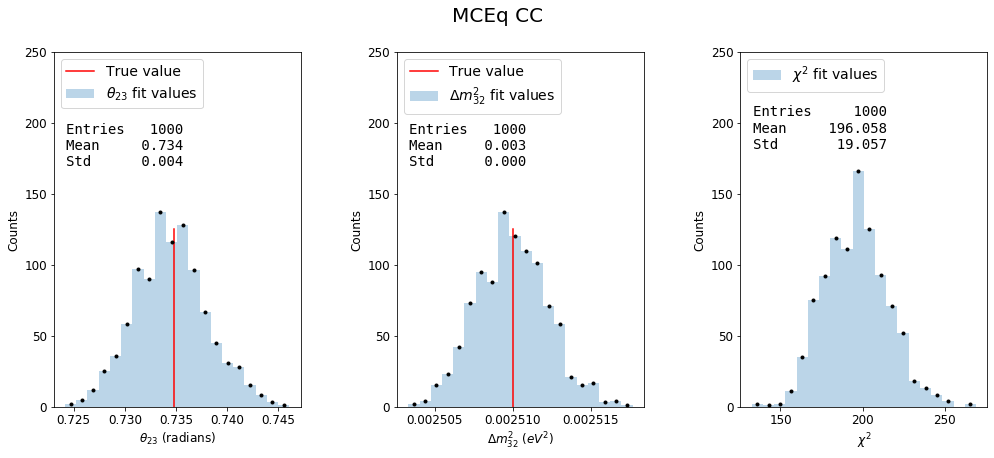

In [129]:
theta23_fits_MCEq_cc, theta23_mean_MCEq_cc, theta23_std_MCEq_cc, DM32_fits_MCEq_cc, DM32_mean_MCEq_cc, DM32_std_MCEq_cc = \
                                                                                                    fit_hist(N_runs, \
                                                                                                    [MCEq_rate10_cc], \
                                                                                                    [MCEq_pseudo_data10_cc], \
                                                                                                    'MCEq CC')

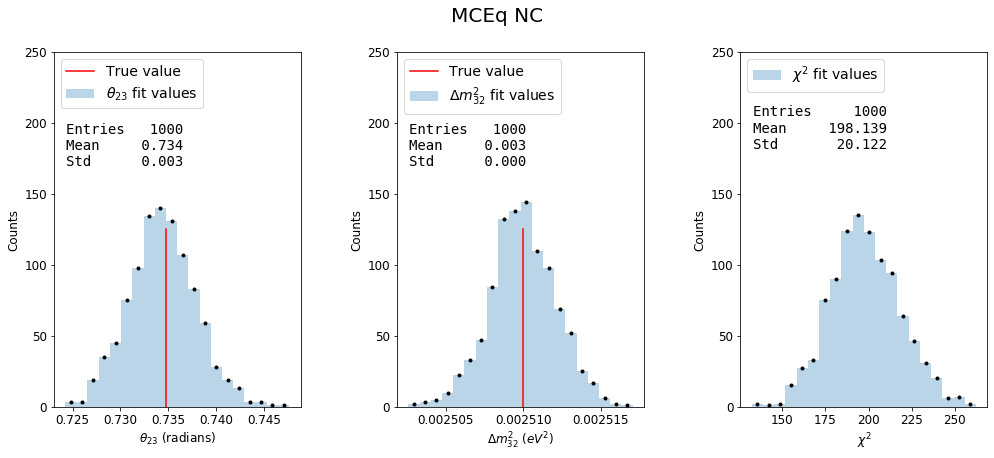

In [130]:
theta23_fits_MCEq_nc, theta23_mean_MCEq_nc, theta23_std_MCEq_nc, DM32_fits_MCEq_nc, DM32_mean_MCEq_nc, DM32_std_MCEq_nc = \
                                                                                                    fit_hist(N_runs, \
                                                                                                    [MCEq_rate10_nc], \
                                                                                                    [MCEq_pseudo_data10_nc], \
                                                                                                    'MCEq NC')

In [663]:
N_landscape = 50
theta23_landscape_MCEq_cc = np.linspace(np.sort(theta23_fits_MCEq_cc)[0], np.sort(theta23_fits_MCEq_cc)[-1], N_landscape)
DM32_landscape_MCEq_cc = np.linspace(np.sort(DM32_fits_MCEq_cc)[0], np.sort(DM32_fits_MCEq_cc)[-1], N_landscape)

theta23_landscape_MCEq_nc = np.linspace(np.sort(theta23_fits_MCEq_nc)[0], np.sort(theta23_fits_MCEq_nc)[-1], N_landscape)
DM32_landscape_MCEq_nc = np.linspace(np.sort(DM32_fits_MCEq_nc)[0], np.sort(DM32_fits_MCEq_nc)[-1], N_landscape)

chi2_MCEq_cc_mean = np.zeros((N_landscape, N_landscape))
chi2_MCEq_nc_mean = np.zeros((N_landscape, N_landscape))

for n in range(20):
    
    MCEq_fluct_cc = r.poisson(MCEq_pseudo_data_cc)
    MCEq_fluct_nc = r.poisson(MCEq_pseudo_data_nc)

    chi2_landscape_values_MCEq_cc = np.zeros((N_landscape, N_landscape))
    chi2_landscape_values_MCEq_nc = np.zeros((N_landscape, N_landscape))

    for t in range(N_landscape):
        for m in range(N_landscape):
            chi2_landscape_values_MCEq_cc[m, t] = chi2_landscape(MCEq_rate_cc, MCEq_fluct_cc, theta23_landscape_MCEq_cc[t], DM32_landscape_MCEq_cc[m])
            chi2_landscape_values_MCEq_nc[m, t] = chi2_landscape(MCEq_rate_nc, MCEq_fluct_nc, theta23_landscape_MCEq_nc[t], DM32_landscape_MCEq_nc[m])
            
    chi2_MCEq_cc_mean += chi2_landscape_values_MCEq_cc
    chi2_MCEq_nc_mean += chi2_landscape_values_MCEq_nc
    
chi2_MCEq_cc_mean /= 20
chi2_MCEq_nc_mean /= 20

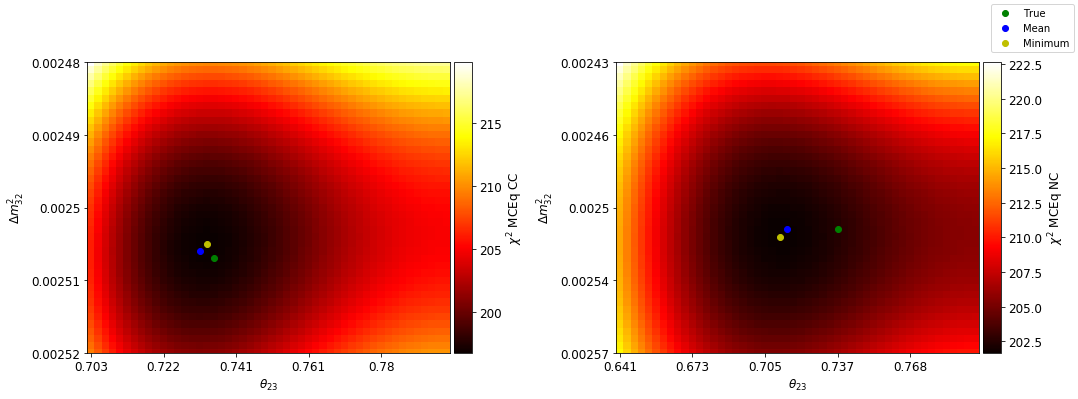

In [664]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax.ravel()

im_cc = ax[0].imshow(chi2_MCEq_cc_mean, cmap='hot')
divider_cc = make_axes_locatable(ax[0])
cax_cc = divider_cc.append_axes("right", size="5%", pad=0.05)
cbar_cc = plt.colorbar(im_cc, cax=cax_cc)
cbar_cc.set_label(r'$\chi^2$ MCEq CC')

im_nc = ax[1].imshow(chi2_MCEq_nc_mean, cmap='hot')
divider_nc = make_axes_locatable(ax[1])
cax_nc = divider_nc.append_axes("right", size="5%", pad=0.05)
cbar_nc = plt.colorbar(im_nc, cax=cax_nc)
cbar_nc.set_label(r'$\chi^2$ MCEq NC')

ax[0].plot(find_nearest_above(theta23_landscape_MCEq_cc, theta23_true), find_nearest_above(DM32_landscape_MCEq_cc, DM32_true), 'go', label='True')
ax[1].plot(find_nearest_above(theta23_landscape_MCEq_nc, theta23_true), find_nearest_above(DM32_landscape_MCEq_nc, DM32_true), 'go')
ax[0].plot(find_nearest_above(theta23_landscape_MCEq_cc, theta23_mean_MCEq_cc), find_nearest_above(DM32_landscape_MCEq_cc, DM32_mean_MCEq_cc), 'bo', label='Mean')
ax[1].plot(find_nearest_above(theta23_landscape_MCEq_nc, theta23_mean_MCEq_nc), find_nearest_above(DM32_landscape_MCEq_nc, DM32_mean_MCEq_nc), 'bo')

chi2_MCEq_cc_min = np.unravel_index(chi2_MCEq_cc_mean.argmin(), chi2_MCEq_cc_mean.shape)
chi2_MCEq_nc_min = np.unravel_index(chi2_MCEq_nc_mean.argmin(), chi2_MCEq_nc_mean.shape)

ax[0].plot(chi2_MCEq_cc_min[1], chi2_MCEq_cc_min[0], 'yo', label='Minimum')
ax[1].plot(chi2_MCEq_nc_min[1], chi2_MCEq_nc_min[0], 'yo')

for n in range(2):
    ax[n].set_xlabel(r'$\theta_{23}$')
    ax[n].set_ylabel(r'$\Delta m^2_{32}$')
    ax[n].set_xticks(np.arange(0,N_landscape, 10))
    ax[n].set_yticks(np.arange(0,N_landscape, 10))
    

ax[0].set_xticklabels([f'{np.round(theta23_landscape_MCEq_cc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[0].set_yticklabels([f'{np.round(DM32_landscape_MCEq_cc[i], 5)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_xticklabels([f'{np.round(theta23_landscape_MCEq_nc[i], 3)}' for i in np.arange(0,N_landscape, 10)])
ax[1].set_yticklabels([f'{np.round(DM32_landscape_MCEq_nc[i], 5)}' for i in np.arange(0,N_landscape, 10)])
plt.tight_layout()
fig.legend();

## Honda fit with MCEq

In [131]:
# Non-fluctuated

Chi2_fit_HondatoMCEq_cc, Prob_fit_HondatoMCEq_cc, par_HondatoMCEq_cc, par_err_HondatoMCEq_cc = \
                                chi_squared(oop.prob_numu_numu, MCEq_rate10_cc, Honda_pseudo_data10_cc, 
                                ['theta23', 'DM32'], [theta23_true, DM32_true])

print('CC:')
print(f'theta23: {par_HondatoMCEq_cc[0]}, DM32: {par_HondatoMCEq_cc[1]}, chi^2: {Chi2_fit_HondatoMCEq_cc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

Chi2_fit_HondatoMCEq_nc, Prob_fit_HondatoMCEq_nc, par_HondatoMCEq_nc, par_err_HondatoMCEq_nc = \
                                chi_squared(oop.prob_numu_numu, MCEq_rate10_nc, Honda_pseudo_data10_nc, 
                                ['theta23', 'DM32'], [theta23_true, DM32_true])

print('NC:')
print(f'theta23: {par_HondatoMCEq_nc[0]}, DM32: {par_HondatoMCEq_nc[1]}, chi^2: {Chi2_fit_HondatoMCEq_nc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

CC:
theta23: 2.4434394675572623e-08, DM32: 0.002434787681063343, chi^2: 1645063.80724962
True values: theta23: 0.7347836150896128, DM32: 0.00251
NC:
theta23: 0.7358851057134955, DM32: 0.0026811905776749105, chi^2: 6784640.91733349
True values: theta23: 0.7347836150896128, DM32: 0.00251


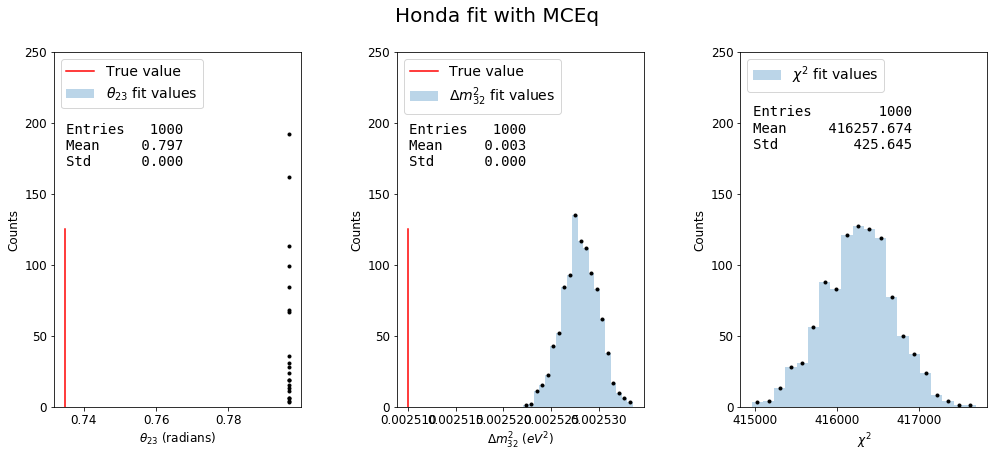

In [137]:
# fluctuated

theta23_fits_HondatoMCEq, theta23_mean_HondatoMCEq, theta23_std_HondatoMCEq, DM32_fits_HondatoMCEq, \
DM32_mean_HondatoMCEq, DM32_std_HondatoMCEq = fit_hist(N_runs, \
                                                    [MCEq_rate10_cc, MCEq_rate10_nc], \
                                                    [Honda_pseudo_data10_cc, Honda_pseudo_data10_nc], \
                                                    'Honda fit with MCEq') #, savefig='HondatoMCEq_fits')

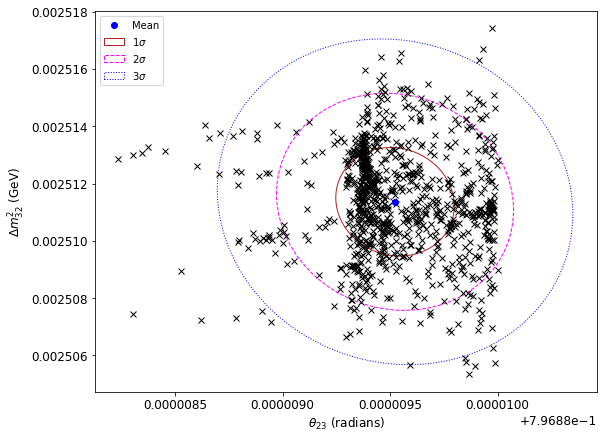

In [136]:
fig, ax = plt.subplots(figsize=(9, 7))

mu_HondatoMCEq = theta23_mean_HondatoMCEq, DM32_mean_HondatoMCEq
scale_HondatoMCEq = theta23_std_HondatoMCEq, DM32_std_HondatoMCEq

ax.plot(theta23_fits_HondatoMCEq, DM32_fits_HondatoMCEq, 'kx')

sigma1_contour_HondatoMCEq, _ = confidence_ellipse(theta23_fits_HondatoMCEq, DM32_fits_HondatoMCEq, ax, n_std=1,
                                                label=r'$1\sigma$', edgecolor='firebrick')
sigma2_contour_HondatoMCEq, _ = confidence_ellipse(theta23_fits_HondatoMCEq, DM32_fits_HondatoMCEq, ax, n_std=2,
                                                label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
sigma3_contour_HondatoMCEq, _ = confidence_ellipse(theta23_fits_HondatoMCEq, DM32_fits_HondatoMCEq, ax, n_std=3,
                                                label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax.plot(mu_HondatoMCEq[0], mu_HondatoMCEq[1], 'bo', label='Mean')
#ax.plot(theta23_true, DM32_true, 'ro', label='True')

ax.legend()
#ax.set_ylim(0.00248, 0.00254)
ax.set_xlabel(r'$\theta_{23}$ (radians)')
ax.set_ylabel(r'$\Delta m_{32}^2$ (GeV)')
plt.show()

## MCEq fit with Honda

In [669]:
# Non-fluctuated

Chi2_fit_MCEqtoHonda_cc, Prob_fit_MCEqtoHonda_cc, par_MCEqtoHonda_cc, par_err_MCEqtoHonda_cc = \
                                chi_squared(oop.prob_numu_numu, [Honda_rate_cc], [MCEq_pseudo_data_cc], 
                                ['theta23', 'DM32'], [theta23_true, DM32_true])

print('CC:')
print(f'theta23: {par_MCEqtoHonda_cc[0]}, DM32: {par_MCEqtoHonda_cc[1]}, chi^2: {Chi2_fit_MCEqtoHonda_cc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

Chi2_fit_MCEqtoHonda_nc, Prob_fit_MCEqtoHonda_nc, par_MCEqtoHonda_nc, par_err_MCEqtoHonda_nc = \
                                chi_squared(oop.prob_numu_numu, [Honda_rate_nc], [MCEq_pseudo_data_nc], 
                                ['theta23', 'DM32'], [theta23_true, DM32_true])

print('NC:')
print(f'theta23: {par_MCEqtoHonda_nc[0]}, DM32: {par_MCEqtoHonda_nc[1]}, chi^2: {Chi2_fit_MCEqtoHonda_nc}')
print(f'True values: theta23: {theta23_true}, DM32: {DM32_true}')

CC:
theta23: 0.7968896761655894, DM32: 0.002565284618866915, chi^2: 6896.080285282415
True values: theta23: 0.7347836150896128, DM32: 0.00251
NC:
theta23: 0.7968892744007187, DM32: 0.0025666908964292728, chi^2: 603.1429647812895
True values: theta23: 0.7347836150896128, DM32: 0.00251


In [124]:
np.mean(MCEq_rate10_cc/Honda_rate10_cc)

0.7644332540999872

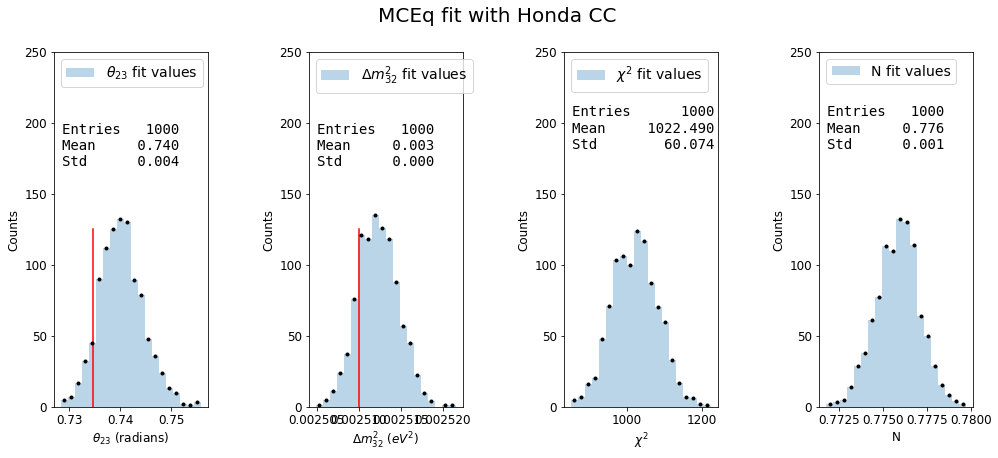

In [136]:
# fluctuated

theta23_fits_MCEqtoHonda_cc, theta23_mean_MCEqtoHonda_cc, theta23_std_MCEqtoHonda_cc, DM32_fits_MCEqtoHonda_cc, \
DM32_mean_MCEqtoHonda_cc, DM32_std_MCEqtoHonda_cc = fit_hist(1000, \
                                                    [Honda_rate10_cc], \
                                                    [MCEq_pseudo_data10_cc], \
                                                    'MCEq fit with Honda CC', normalization=0.76)

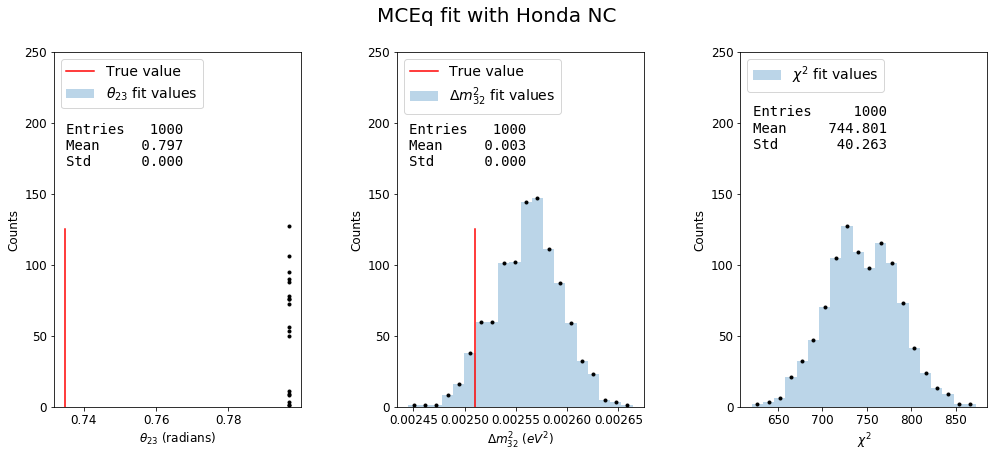

In [671]:
theta23_fits_MCEqtoHonda_nc, theta23_mean_MCEqtoHonda_nc, theta23_std_MCEqtoHonda_nc, DM32_fits_MCEqtoHonda_nc, \
DM32_mean_MCEqtoHonda_nc, DM32_std_MCEqtoHonda_nc = fit_hist(1000, \
                                                    [Honda_rate_nc], \
                                                    [MCEq_pseudo_data_nc], \
                                                    'MCEq fit with Honda NC')

### Track vs cascade

In [147]:
def chi_squared_track(fit_rates, pseudo_data, fit_parameters, guesses):
    
    def chi2_owncalc_track(*fit_parameters):
        
        if len(fit_parameters) ==2:
            rate_numu_numu = fit_rates[0] * oop.prob_numu_numu(*fit_parameters)
            rate_nue_numu = fit_rates[1] * oop.prob_nue_numu(*fit_parameters)
            rate_numubar_numubar = fit_rates[2] * oop.prob_numu_numu(*fit_parameters)
            rate_nuebar_numubar = fit_rates[3] * oop.prob_nue_numu(*fit_parameters)
            
        elif len(fit_parameters) ==3:
            rate_numu_numu = fit_func(fit_rates[0], oop.prob_numu_numu, *fit_parameters)
            rate_nue_numu = fit_func(fit_rates[1], oop.prob_nue_numu, *fit_parameters)
            rate_numubar_numubar = fit_func(fit_rates[2], oop.prob_numu_numu, *fit_parameters)
            rate_nuebar_numubar = fit_func(fit_rates[3], oop.prob_nue_numu, *fit_parameters)
        
        for i in range(len(energy_min)):
            rate_numu_numu[:, i] *= Aeff_numu_cc[i]
            rate_nue_numu[:, i] *= Aeff_numu_cc[i]
            rate_numubar_numubar[:, i] *= Aeff_numubar_cc[i]
            rate_nuebar_numubar[:, i] *= Aeff_numubar_cc[i]
            
        fit_data = rate_numu_numu + rate_nue_numu + rate_numubar_numubar + rate_nuebar_numubar
        
        chi2 = np.sum(((pseudo_data - fit_data)**2 / fit_data))
            
        return chi2
    
    chi2_owncalc_track.errordef = 1.0
    
    if len(fit_parameters)==2:
        minuit = Minuit(chi2_owncalc_track, theta23 = guesses[0], DM32 = guesses[1] , name=('theta23', 'DM32')) #, limit=[(0, np.pi/2), None])
    
    elif len(fit_parameters)==3:
        minuit = Minuit(chi2_owncalc_track, theta23 = guesses[0], DM32 = guesses[1] , N = guesses[2], name=('theta23', 'DM32', 'N'))
        minuit.limits['N'] = (0.5, 1.7)

    minuit.limits['theta23'] = (0, theta_maxmixing)
    minuit.limits['DM32'] = DM32_lim
    minuit.tol = 0.00001
    minuit.migrad()
    
    Nvar = len(fit_parameters)               
    Ndof = 200 - Nvar
    
    Chi2_fit = minuit.fval          
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof)
    minuit.migrad()
    
    par = minuit.values[:]
    par_err = minuit.errors[:] 
    par_name = minuit.parameters[:]
    

    return Chi2_fit, Prob_fit, par, par_err



def chi_squared_cascade(fit_rates, pseudo_data, fit_parameters, guesses):
    
    def chi2_owncalc_cascade(*fit_parameters):
        
        if len(fit_parameters) == 2:
            rate_numu_numu_nc = fit_rates[0] * oop.prob_numu_numu(*fit_parameters)
            rate_nue_numu_nc = fit_rates[1] * oop.prob_nue_numu(*fit_parameters)
            rate_numubar_numubar_nc = fit_rates[2] * oop.prob_numu_numu(*fit_parameters)
            rate_nuebar_numubar_nc= fit_rates[3] * oop.prob_nue_numu(*fit_parameters)

            rate_numu_nutau_nc = fit_rates[0] * oop.prob_numu_nutau(*fit_parameters)
            rate_numu_nue_nc = fit_rates[0] * oop.prob_numu_nue(*fit_parameters)
            rate_nue_nue_nc = fit_rates[1] * oop.prob_nue_nue(*fit_parameters)
            rate_nue_nutau_nc= fit_rates[1] * oop.prob_nue_nutau(*fit_parameters)

            rate_numubar_nutaubar_nc = fit_rates[2] * oop.prob_numu_nutau(*fit_parameters)
            rate_numubar_nuebar_nc = fit_rates[2] * oop.prob_numu_nue(*fit_parameters)
            rate_nuebar_nuebar_nc = fit_rates[3] * oop.prob_nue_nue(*fit_parameters)
            rate_nuebar_nutaubar_nc= fit_rates[3] * oop.prob_nue_nutau(*fit_parameters)
            
        elif len(fit_parameters) == 3:
            rate_numu_numu_nc = fit_func(fit_rates[0], oop.prob_numu_numu, *fit_parameters)
            rate_nue_numu_nc = fit_func(fit_rates[1], oop.prob_nue_numu, *fit_parameters)
            rate_numubar_numubar_nc = fit_func(fit_rates[2], oop.prob_numu_numu, *fit_parameters)
            rate_nuebar_numubar_nc= fit_func(fit_rates[3], oop.prob_nue_numu, *fit_parameters)

            rate_numu_nutau_nc = fit_func(fit_rates[0], oop.prob_numu_nutau, *fit_parameters)
            rate_numu_nue_nc = fit_func(fit_rates[0], oop.prob_numu_nue, *fit_parameters)
            rate_nue_nue_nc = fit_func(fit_rates[1], oop.prob_nue_nue, *fit_parameters)
            rate_nue_nutau_nc= fit_func(fit_rates[1], oop.prob_nue_nutau, *fit_parameters)

            rate_numubar_nutaubar_nc = fit_func(fit_rates[2], oop.prob_numu_nutau, *fit_parameters)
            rate_numubar_nuebar_nc = fit_func(fit_rates[2], oop.prob_numu_nue, fit_parameters)
            rate_nuebar_nuebar_nc = fit_func(fit_rates[3], oop.prob_nue_nue, *fit_parameters)
            rate_nuebar_nutaubar_nc= fit_func(fit_rates[3], oop.prob_nue_nutau, *fit_parameters)
        
        rate_numu_nutau_cc = rate_numu_nutau_nc.copy()
        rate_numu_nue_cc = rate_numu_nue_nc.copy()
        rate_nue_nue_cc = rate_nue_nue_nc.copy()
        rate_nue_nutau_cc= rate_nue_nutau_nc.copy()
        
        rate_numubar_nutaubar_cc = rate_numubar_nutaubar_nc.copy()
        rate_numubar_nuebar_cc = rate_numubar_nuebar_nc.copy()
        rate_nuebar_nuebar_cc = rate_nuebar_nuebar_nc.copy()
        rate_nuebar_nutaubar_cc= rate_nuebar_nutaubar_nc.copy()
        
        for i in range(len(energy_min)):
            rate_numu_numu_nc[:, i] *= Aeff_numu_nc[i]
            rate_nue_numu_nc[:, i] *= Aeff_numu_nc[i]
            rate_numubar_numubar_nc[:, i] *= Aeff_numubar_nc[i]
            rate_nuebar_numubar_nc[:, i] *= Aeff_numubar_nc[i]
            
            rate_numu_nutau_nc[:,i] *= Aeff_nutau_nc[i]
            rate_numu_nue_nc[:,i] *= Aeff_nue_nc[i]
            rate_nue_nue_nc[:,i] *= Aeff_nue_nc[i]
            rate_nue_nutau_nc[:,i] *= Aeff_nutau_nc[i]
            
            rate_numubar_nutaubar_nc[:,i] *= Aeff_nutaubar_nc[i]
            rate_numubar_nuebar_nc[:,i] *= Aeff_nuebar_nc[i]
            rate_nuebar_nuebar_nc[:,i] *= Aeff_nuebar_nc[i]
            rate_nuebar_nutaubar_nc[:,i] *= Aeff_nutaubar_nc[i]
            
            rate_numu_nutau_cc[:,i] *= Aeff_nutau_cc[i]
            rate_numu_nue_cc[:,i] *= Aeff_nue_cc[i]
            rate_nue_nue_cc[:,i] *= Aeff_nue_cc[i]
            rate_nue_nutau_cc[:,i] *= Aeff_nutau_cc[i]
            
            rate_numubar_nutaubar_cc[:,i] *= Aeff_nutaubar_cc[i]
            rate_numubar_nuebar_cc[:,i] *= Aeff_nuebar_cc[i]
            rate_nuebar_nuebar_cc[:,i] *= Aeff_nuebar_cc[i]
            rate_nuebar_nutaubar_cc[:,i] *= Aeff_nutaubar_cc[i]
            
        
        fit_data = rate_numu_numu_nc + rate_nue_numu_nc + rate_numu_nutau_nc + rate_numu_nue_nc + rate_nue_nue_nc + rate_nue_nutau_nc \
                    + rate_numu_nutau_cc + rate_numu_nue_cc + rate_nue_nue_cc + rate_nue_nutau_cc \
                    + rate_numubar_numubar_nc + rate_nuebar_numubar_nc + rate_numubar_nutaubar_nc + rate_numubar_nuebar_nc + rate_nuebar_nuebar_nc + rate_nuebar_nutaubar_nc \
                    + rate_numubar_nutaubar_cc + rate_numubar_nuebar_cc + rate_nuebar_nuebar_cc + rate_nuebar_nutaubar_cc
        
        chi2 = np.sum(((pseudo_data - fit_data)**2 / fit_data))
            
        return chi2

    chi2_owncalc_cascade.errordef = 1.0
    
    if len(fit_parameters)==2:
        minuit = Minuit(chi2_owncalc_track, theta23 = guesses[0], DM32 = guesses[1] , name=('theta23', 'DM32')) 
    
    elif len(fit_parameters)==3:
        minuit = Minuit(chi2_owncalc_track, theta23 = guesses[0], DM32 = guesses[1] , N = guesses[2], name=('theta23', 'DM32', 'N'))
        minuit.limits['N'] = (0.5, 1.7)
    
    minuit.limits['theta23'] = (0, theta_maxmixing)
    minuit.limits['DM32'] = (0.00243, 0.002593) #DM32_lim
    minuit.tol = 0.00001
    minuit.migrad()
    
    Nvar = len(fit_parameters)               
    Ndof = 200 - Nvar
    
    Chi2_fit = minuit.fval          
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof)
    minuit.migrad()
    
    par = minuit.values[:]
    par_err = minuit.errors[:] 
    par_name = minuit.parameters[:]
    

    return Chi2_fit, Prob_fit, par, par_err

In [140]:
def fit_hist_track(N, rates, pseudo, title, guess = [theta23_true, DM32_true], true = [theta23_true, DM32_true], savefig = False, normalization=None):
    
    fit_params = ['theta23', 'DM32']
    N_ax = 3
        
    if normalization != None:
        guess.append(normalization)
        fit_params.append('N')
        N_ax = 4
    
    chi2_array = np.zeros(N)
    theta23_fits = np.zeros(N)
    DM32_fits = np.zeros(N)
    N_fits = np.zeros(N)
    
    for n in range(N):
        pseudo_fluct = r.poisson(pseudo)
            
        Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared_track(rates, 
                                                                   pseudo_fluct, fit_params, 
                                                                       guess)
        chi2_array[n] = Chi2_fluct
        theta23_fits[n] = par_fluct[0]
        DM32_fits[n] =  par_fluct[1]
        
        if normalization!=None:
            N_fits[n] = par_fluct[2]
        
    fig, axs = plt.subplots(1, N_ax, figsize=(15,7))
    axs.ravel()

    x_labels = [r'$\theta_{23}$ (radians)', r'$\Delta m_{32}^2$ ($eV^2$)', r'$\chi^2$']

    height = N/4
    
    if normalization !=None:
        x_labels.append('N')
        cef.make_hist(axs[3], N_fits, Nbins=20, loc_dic = (0.05, 0.85), label=(r'N fit values', ''),
                  errors = False)

    x_theta, y_theta, sy_theta, binwidth_theta, theta23_mean, theta23_std = cef.make_hist(axs[0], theta23_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\theta_{23}$ fit values', ''), errors = False, decimals=4)
    x_dm, y_dm, sy_dm, binwidth_dm, DM32_mean, DM32_std = cef.make_hist(axs[1], DM32_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\Delta m_{32}^2$ fit values', ''),errors = False, decimals=6)
    cef.make_hist(axs[2], chi2_array, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\chi^2$ fit values', ''),
                  errors = False)
    
    for n in range(N_ax):
        if n<2:
            axs[n].plot([true[n], true[n]], [0,height/2], 'r-', label='True value')
        axs[n].set_ylim(0,height)
        axs[n].set_ylabel('Counts')
        axs[n].set_xlabel(x_labels[n])    

    plt.suptitle(title, fontsize=20);
    fig.tight_layout(pad=5.0);
    
    if savefig != False:
        fig.savefig(savefig)
    
    return theta23_fits, theta23_mean, theta23_std, DM32_fits, DM32_mean, DM32_std, chi2_array

In [146]:
def fit_hist_cascade(N, rates, pseudo, title, guess = [theta23_true, DM32_true], true = [theta23_true, DM32_true], savefig = False, asimov= False, normalization=None):
    
    fit_params = ['theta23', 'DM32']
    N_ax = 3
        
    if normalization != None:
        guess.append(normalization)
        fit_params.append('N')
        N_ax = 4
    
    if asimov == False:
        chi2_array = np.zeros(N)
        theta23_fits = np.zeros(N)
        DM32_fits = np.zeros(N)
        N_fits = np.zeros(N)
        
        for n in range(N):
            pseudo_fluct = r.poisson(pseudo)

            Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared_cascade(rates, pseudo_fluct,
                                                                                    fit_params, guess)
            chi2_array[n] = Chi2_fluct
            theta23_fits[n] = par_fluct[0]
            DM32_fits[n] =  par_fluct[1]
            
            if normalization!=None:
                N_fits[n] = par_fluct[2]
            
    elif asimov:
        theta_guess = np.linspace(0.2, 0.95, 100)  #(0.5, 0.9, 100)
        DM_guess = np.linspace(0.001, 0.003, 100)
        guesses = list(zip(theta_guess, DM_guess))
        
        chi2_array = np.zeros(len(guesses))
        theta23_fits = np.zeros(len(guesses))
        DM32_fits = np.zeros(len(guesses))
    
        for n in range(len(guesses)):

            Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared_cascade(rates, 
                                                                       pseudo, ['theta23', 'DM32'], 
                                                                           guesses[n])
            chi2_array[n] = Chi2_fluct
            theta23_fits[n] = par_fluct[0]
            DM32_fits[n] =  par_fluct[1]
        
    fig, axs = plt.subplots(1, N_ax, figsize=(15,7))
    axs.ravel()
    
    x_labels = [r'$\theta_{23}$ (radians)', r'$\Delta m_{32}^2$ ($eV^2$)', r'$\chi^2$']

    height = N/4
    
    if normalization !=None:
        x_labels.append('N')
        cef.make_hist(axs[3], N_fits, Nbins=20, loc_dic = (0.05, 0.85), label=(r'N fit values', ''),
                  errors = False)

    x_theta, y_theta, sy_theta, binwidth_theta, theta23_mean, theta23_std = cef.make_hist(axs[0], theta23_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\theta_{23}$ fit values', ''), errors = False, decimals=4)
    x_dm, y_dm, sy_dm, binwidth_dm, DM32_mean, DM32_std = cef.make_hist(axs[1], DM32_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\Delta m_{32}^2$ fit values', ''),errors = False, decimals=6)
    cef.make_hist(axs[2], chi2_array, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\chi^2$ fit values', ''),
                  errors = False)
    
    
    for n in range(N_ax):
        if n<2:
            axs[n].plot([true[n], true[n]], [0,height/2], 'r-', label='True value')
        axs[n].set_ylim(0,height)
        axs[n].set_ylabel('Counts')
        axs[n].set_xlabel(x_labels[n]) 

    plt.suptitle(title, fontsize=20);
    fig.tight_layout(pad=5.0);
    
    if savefig != False:
        fig.savefig(savefig)
    
    return theta23_fits, theta23_mean, theta23_std, DM32_fits, DM32_mean, DM32_std

In [142]:
N_runs=1000
Honda_rates_track = [Honda_numu_rate10, Honda_nue_rate10, Honda_numubar_rate10, Honda_nuebar_rate10]
Honda_pseudo_track = Honda_numu_numu_cc + Honda_nue_numu_cc + Honda_numu_numu_bar_cc + Honda_nue_numu_bar_cc

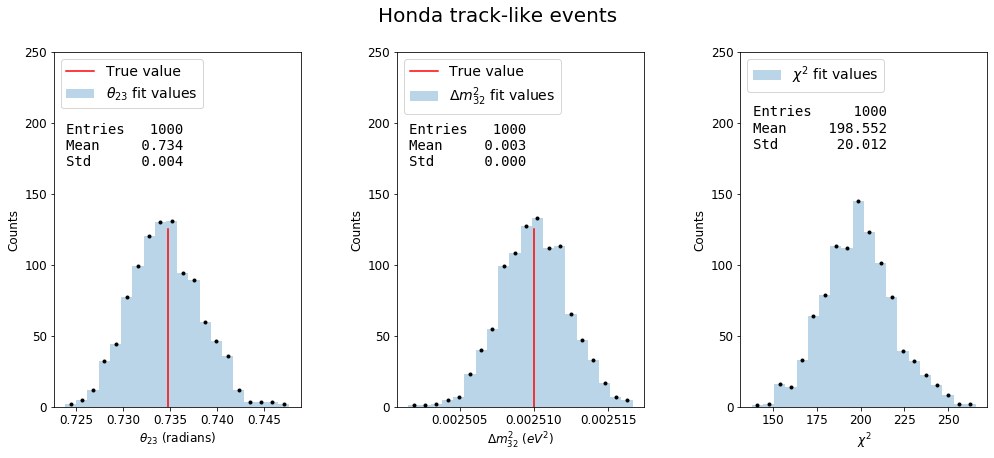

In [112]:
theta23_fits_Honda_track, theta23_mean_Honda_track, theta23_std_Honda_track, DM32_fits_Honda_track, DM32_mean_Honda_track, DM32_std_Honda_track, chi2_track = \
            fit_hist_track(N_runs, Honda_rates_track, Honda_pseudo_track, title ='Honda track-like events')

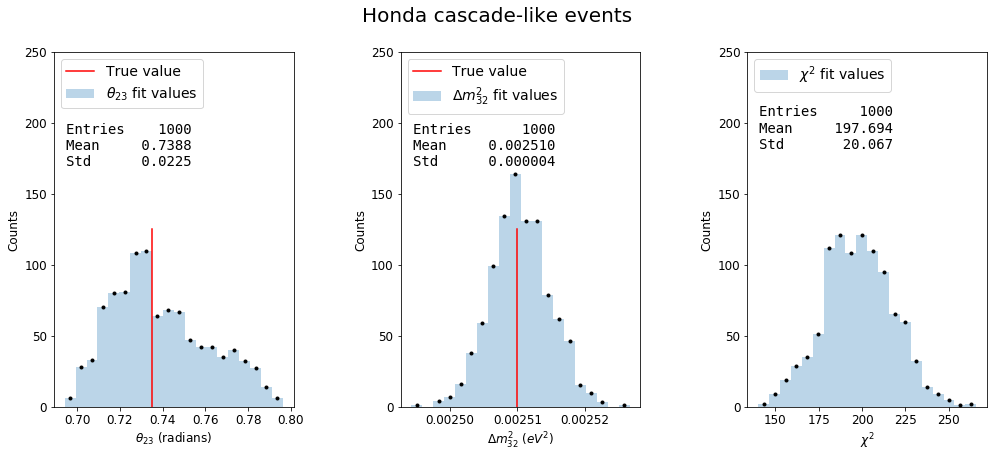

In [47]:
Honda_rates_cascade = [Honda_numu_rate10, Honda_nue_rate10, Honda_numubar_rate10, Honda_nuebar_rate10]
Honda_pseudo_cascade = Honda_numu_numu_nc + Honda_nue_numu_nc + Honda_numu_nutau_nc + Honda_numu_nue_nc \
+ Honda_nue_nue_nc + Honda_nue_nutau_nc + Honda_numu_nutau_cc + Honda_numu_nue_cc + Honda_nue_nue_cc \
+ Honda_nue_nutau_cc + Honda_numu_numu_bar_nc + Honda_nue_numu_bar_nc + Honda_numu_nutau_bar_nc \
+ Honda_numu_nue_bar_nc + Honda_nue_nue_bar_nc + Honda_nue_nutau_bar_nc + Honda_numu_nutau_bar_cc \
+ Honda_numu_nue_bar_cc + Honda_nue_nue_bar_cc + Honda_nue_nutau_bar_cc 

theta23_fits_Honda_cascade, theta23_mean_Honda_cascade, theta23_std_Honda_cascade, DM32_fits_Honda_cascade, DM32_mean_Honda_cascade, DM32_std_Honda_cascade = \
            fit_hist_cascade(N_runs, Honda_rates_cascade, Honda_pseudo_cascade, title ='Honda cascade-like events')

In [167]:
MCEq1D_rates_track = [MCEq1D_numu_rate10, MCEq1D_nue_rate10, MCEq1D_numubar_rate10, MCEq1D_nuebar_rate10]
MCEq1D_pseudo_track = MCEq1D_numu_numu_cc + MCEq1D_nue_numu_cc + MCEq1D_numu_numu_bar_cc + MCEq1D_nue_numu_bar_cc

MCEq2D_rates_track = [MCEq2D_numu_rate10, MCEq2D_nue_rate10, MCEq2D_numubar_rate10, MCEq2D_nuebar_rate10]
MCEq2D_pseudo_track = MCEq2D_numu_numu_cc + MCEq2D_nue_numu_cc + MCEq2D_numu_numu_bar_cc + MCEq2D_nue_numu_bar_cc

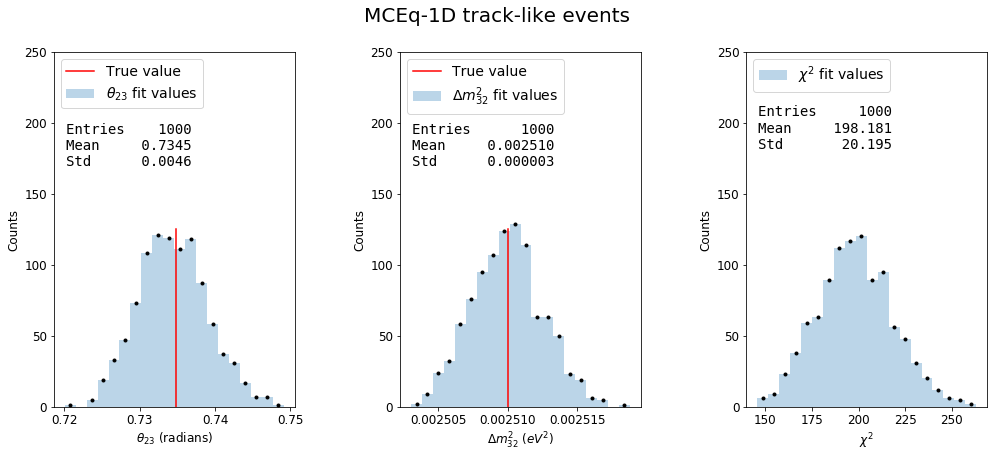

In [17]:
theta23_fits_MCEq1D_track, theta23_mean_MCEq1D_track, theta23_std_MCEq1D_track, DM32_fits_MCEq1D_track, DM32_mean_MCEq1D_track, DM32_std_MCEq1D_track, chi2_MCEq1D = \
            fit_hist_track(N_runs, MCEq1D_rates_track, MCEq1D_pseudo_track, title ='MCEq-1D track-like events')

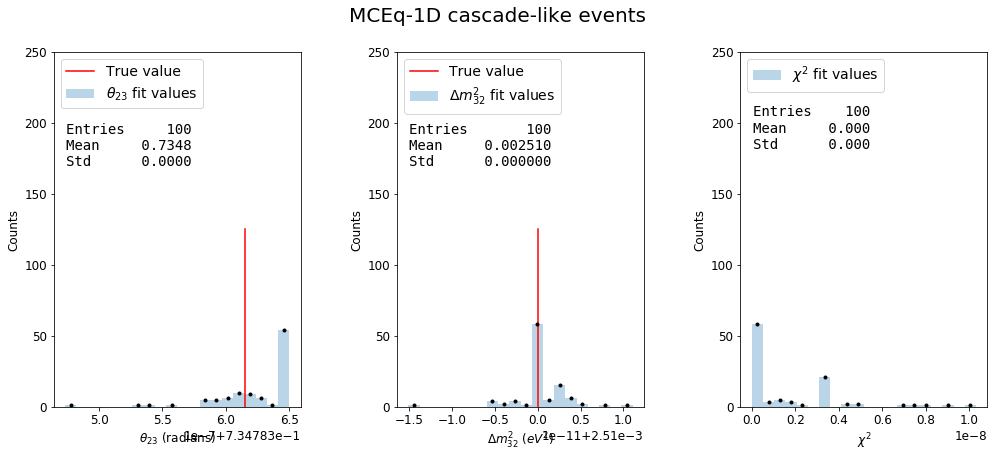

In [88]:
MCEq1D_rates_cascade =  [MCEq1D_numu_rate10, MCEq1D_nue_rate10, MCEq1D_numubar_rate10, MCEq1D_nuebar_rate10]
MCEq1D_pseudo_cascade = MCEq1D_numu_numu_nc + MCEq1D_nue_numu_nc + MCEq1D_numu_nutau_nc + MCEq1D_numu_nue_nc \
+ MCEq1D_nue_nue_nc + MCEq1D_nue_nutau_nc + MCEq1D_numu_nutau_cc + MCEq1D_numu_nue_cc + MCEq1D_nue_nue_cc \
+ MCEq1D_nue_nutau_cc + MCEq1D_numu_numu_bar_nc + MCEq1D_nue_numu_bar_nc + MCEq1D_numu_nutau_bar_nc \
+ MCEq1D_numu_nue_bar_nc + MCEq1D_nue_nue_bar_nc + MCEq1D_nue_nutau_bar_nc + MCEq1D_numu_nutau_bar_cc \
+ MCEq1D_numu_nue_bar_cc + MCEq1D_nue_nue_bar_cc + MCEq1D_nue_nutau_bar_cc 

theta23_fits_MCEq1D_cascade, theta23_mean_MCEq1D_cascade, theta23_std_MCEq1D_cascade, DM32_fits_MCEq1D_cascade, DM32_mean_MCEq1D_cascade, DM32_std_MCEq1D_cascade = \
            fit_hist_cascade(N_runs, MCEq1D_rates_cascade, MCEq1D_pseudo_cascade, title ='MCEq-1D cascade-like events', asimov=True)

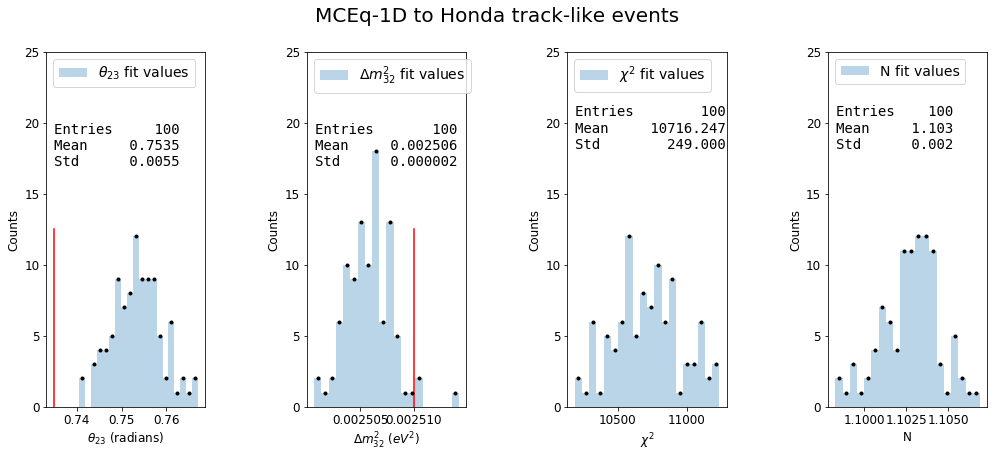

In [168]:
theta23_fits_MCEq1DtoHonda_track, theta23_mean_MCEq1DtoHonda_track, theta23_std_MCEq1DtoHonda_track, DM32_fits_MCEq1DtoHonda_track, \
DM32_mean_MCEq1DtoHOnda_track, DM32_std_MCEq1DtoHonda_track, chi2_MCEq1DtoHonda_track = \
            fit_hist_track(100, MCEq1D_rates_track, Honda_pseudo_track, title ='MCEq-1D to Honda track-like events', normalization=1.5)

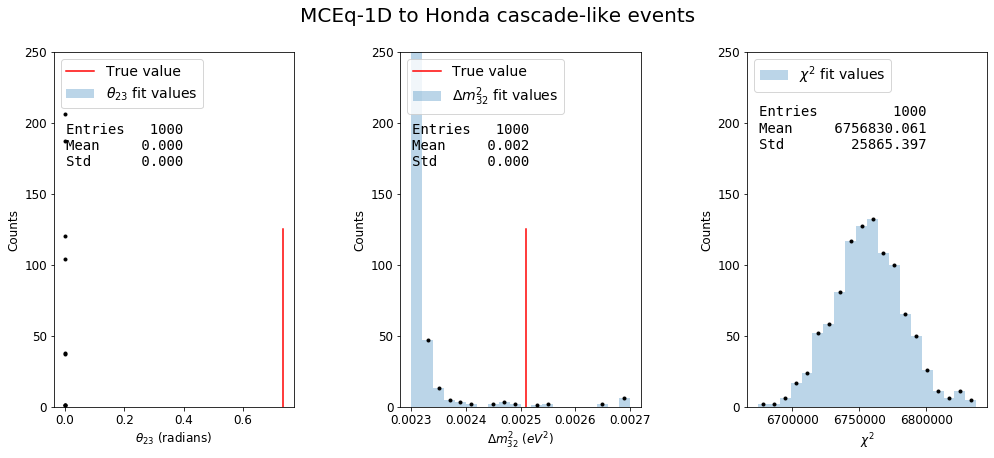

In [59]:
theta23_fits_MCEq1DtoHonda_cascade, theta23_mean_MCEq1DtoHonda_cascade, theta23_std_MCEq1DtoHonda_cascade, DM32_fits_MCEq1DtoHonda_cascade, \
DM32_mean_MCEq1DtoHOnda_cascade, DM32_std_MCEq1DtoHonda_cascade, chi2_MCEq1DtoHonda_cascade = \
            fit_hist_cascade(N_runs, MCEq1D_rates_cascade, Honda_pseudo_cascade, title ='MCEq-1D to Honda cascade-like events')

In [169]:
theta23_fits_MCEq1Dto2D_track, theta23_mean_MCEq1Dto2D_track, theta23_std_MCEq1Dto2D_track, DM32_fits_MCEq1Dto2D_track, \
DM32_mean_MCEq1Dto2D_track, DM32_std_MCEq1Dto2D_track, chi2_MCEq1Dto2D_track = \
            fit_hist_track(N_runs, MCEq1D_rates_track, MCEq2D_rates_track, title ='MCEq-1d to MCEq-2d track-like events', normalization=1)

ValueError: lam value too large